### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

## Importing Pandas

In [29]:
import pandas as pd
import numpy as np

## Pandas Series
A Pandas Series is like a column in a table. It is a 1-D array holding data of any type. Since we did not specify an index for the data, a
default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created.

### Series from lists

In [30]:
# string datatype
countries = ['India', 'Nepal', 'Bhutan', 'Russia']

c = pd.Series(countries)
c

0     India
1     Nepal
2    Bhutan
3    Russia
dtype: object

In [31]:
# numeric datatype
runs = [87, 69, 92, 79, 84]

runs_ser = pd.Series(runs)
runs_ser

0    87
1    69
2    92
3    79
4    84
dtype: int64

ser.array returns numpy array containing all the values.

In [32]:
runs_ser.array

<NumpyExtensionArray>
[87, 69, 92, 79, 84]
Length: 5, dtype: int64

In [33]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

### Series with custom indexing
- We can create series with custom indexing but the size should be equal.

In [34]:
marks = [89, 78, 93, 91]
subjcets = ['maths', 'english', 'science', 'hindi']

marks_subjects = pd.Series(marks, index=subjcets)
marks_subjects

maths      89
english    78
science    93
hindi      91
dtype: int64

### Naming the Series

In [35]:
# Dictionary
marks_dict = {
    'maths':84,
    'english':57,
    'science':89,
    'hindi':97
}

marks = pd.Series(marks_dict, name='Dilkhush\'s marks')
marks

maths      84
english    57
science    89
hindi      97
Name: Dilkhush's marks, dtype: int64

## Series Attributes

### ser.size
- returns total number of non-Nan values in the series.

In [36]:
marks

maths      84
english    57
science    89
hindi      97
Name: Dilkhush's marks, dtype: int64

In [37]:
marks.size

4

### ser.dtype
- returns the datatype of series
- datatype of series can be altered during creation.

In [38]:
marks.dtype

dtype('int64')

In [39]:
marks = pd.Series(marks_dict, name='Dilkhush\'s Marks', dtype=int)

In [40]:
marks.dtype

dtype('int32')

In [41]:
temp = pd.Series([1, 2, "Hello", 4.3])

In [42]:
temp.dtype

dtype('O')

In [43]:
print(type(temp[0]))
print(type(temp[1]))
print(type(temp[2]))
print(type(temp[3]))

<class 'int'>
<class 'int'>
<class 'str'>
<class 'float'>


`Note` - NumPy Array contains values of one data type but Pandas series can contain values of different datatypes.

### ser.name
- returns name of series

In [44]:
marks.name

"Dilkhush's Marks"

In [45]:
temp.name

### ser.index
- if the name of the index follows the python rules for variable naming then we can extract the values using ser.index

In [46]:
marks_subjects

maths      89
english    78
science    93
hindi      91
dtype: int64

In [47]:
marks_subjects.maths

89

### ser.index
- return Index object containing indices of series in case of indexes are strings,
- if indices are numbers, RangeIndex is returned

In [48]:
marks.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [49]:
temp.index

RangeIndex(start=0, stop=4, step=1)

### ser.values
- returns ndarray containing values

In [50]:
marks.values

array([84, 57, 89, 97])

## Reading Data
- We can read data using pandas inbuilt function, read_csv()
- read_csv() by default create DataFrame object, we can transform it into Series using squeeze function

Text and binary data loading functions in pandas
| Function         | Description                                                                                             |
|------------------|---------------------------------------------------------------------------------------------------------|
| read_csv         | Load delimited data from a file, URL, or file-like object; use comma as default delimiter                |
| read_fwf         | Read data in fixed-width column format (i.e., no delimiters)                                             |
| read_clipboard   | Variation of read_csv that reads data from the clipboard; useful for converting tables from web pages    |
| read_excel       | Read tabular data from an Excel XLS or XLSX file                                                         |
| read_hdf         | Read HDF5 files written by pandas                                                                        |
| read_html        | Read all tables found in the given HTML document                                                         |
| read_json        | Read data from a JSON (JavaScript Object Notation) string representation, file, URL, or file-like object |
| read_feather     | Read the Feather binary file format                                                                      |
| read_orc         | Read the Apache ORC binary file format                                                                   |
| read_parquet     | Read the Apache Parquet binary file format                                                               |
| read_pickle      | Read an object stored by pandas using the Python pickle format                                           |
| read_sas         | Read a SAS dataset stored in one of the SAS system’s custom storage formats                              |
| read_spss        | Read a data file created by SPSS                                                                         |
| read_sql         | Read the results of a SQL query (using SQLAlchemy)                                                       |
| read_sql_table   | Read a whole SQL table (using SQLAlchemy); equivalent to using a query that selects everything in that table using read_sql |
| read_stata       | Read a dataset from Stata file format                                                                    |
| read_xml         | Read a table of data from an XML file                                                                    |


In [51]:
subs = pd.read_csv('subs.csv')
type(subs)

pandas.core.frame.DataFrame

`Note` - pd.read_csv() directly reads the data into DataFrame but on that squeeze() function can be used to convert to Series

In [52]:
subs = subs.squeeze()

In [53]:
type(subs)

pandas.core.series.Series

In [54]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [55]:
vk = pd.read_csv('kohli_ipl.csv', index_col='match_no', dtype=int)
vk = vk.squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int32

In [56]:
movies = pd.read_csv('bollywood.csv', index_col='movie')
movies = movies.squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Series Methods

### ser.head(n) or ser.tail(n)
- Return top or bottom n values from the series
- if n is not provided then by default n is 5

In [57]:
subs.head()

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [58]:
vk.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int32

In [59]:
movies.tail(4)

movie
Aankhen (2002 film)     Amitabh Bachchan
Saathiya (film)             Vivek Oberoi
Company (film)                Ajay Devgn
Awara Paagal Deewana        Akshay Kumar
Name: lead, dtype: object

### ser.sample(n)
- returns randomly sampled n values.
- by default n is 1

In [60]:
movies.sample()

movie
Dhadak    Ishaan Khattar
Name: lead, dtype: object

In [61]:
movies.sample(3)

movie
Mad About Dance      Saahil Prem
Hotel Salvation     Adil Hussain
Why Cheat India    Emraan Hashmi
Name: lead, dtype: object

### ser.value_counts()
- returns series of count of values

In [62]:
movies.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

In [63]:
vk.value_counts()

runs
0     9
1     8
12    8
9     7
35    6
     ..
36    1
45    1
71    1
37    1
53    1
Name: count, Length: 78, dtype: int64

### ser.sort_values(ascending = True, inplace = False)
- return sorted array on the basis of values.
- no change into original series.
- by default sort in ascencing order
- inplace is used to make permanent changes into original series

In [64]:
vk.sort_values(ascending=False)

match_no
128    113
126    109
123    108
164    100
120    100
      ... 
93       0
211      0
130      0
8        0
135      0
Name: runs, Length: 215, dtype: int32

In [65]:
movies.sort_values() # Alphabetically in case of string

movie
Qaidi Band                            Aadar Jain
Roar: Tigers of the Sundarbans      Aadil Chahal
Lipstick Under My Burkha            Aahana Kumra
Raat Gayi Baat Gayi?                Aamir Bashir
Talaash: The Answer Lies Within       Aamir Khan
                                        ...     
Dil Toh Deewana Hai                  Zeenat Aman
Sallu Ki Shaadi                      Zeenat Aman
Strings of Passion                   Zeenat Aman
Dunno Y... Na Jaane Kyon             Zeenat Aman
Taj Mahal: An Eternal Love Story     Zulfi Sayed
Name: lead, Length: 1500, dtype: object

### ser.sort_index(ascending = True, inplace = False)
- works same as sort_values() but on index
- inplace parameter is used for making permanent changes into series

In [66]:
movies.sort_index()

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

## Mathematical Operations on Series

### ser.count()
`Note` - count - only count all the values excluding missing values while size counts all


In [67]:
vk.count() # total matches played by vk

215

### ser.sum()
- sum of all elements of series

In [68]:
subs.sum() # total subscriber gained in last 365 days

49510

### ser.product()
- product of all elements of the series

In [69]:
vk.prod()

0

In [70]:
vk.product()

0

### ser.mean()/median()/mode()/std()/var()
- apply stastical operations on series

In [71]:
subs.mean() # average subscribers gain every day

135.64383561643837

In [72]:
vk.median() # median score

24.0

In [73]:
movies.mode() # frequent lead in movies

0    Akshay Kumar
Name: lead, dtype: object

In [74]:
subs.std()

62.6750230372527

In [75]:
vk.var()

688.0024777222343

### ser.min()/max()
- returns minimum or maximum element from the series

In [76]:
subs.max()

396

In [77]:
vk.min()

0

### ser.describe()
- return series containing count, mean, std, min, 25%, 50%, 75% and max

In [78]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

## Indexing
- Values can be fetched using positional indexing or keyword indexing.
- Negative indexing only works if data type of index is string(object)

In [79]:
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

In [80]:
x[0]

12

In [81]:
x[-1]

KeyError: -1

In [ ]:
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
movies.iloc[-1]

'Akshay Kumar'

In [ ]:
movies['Awara Paagal Deewana']

'Akshay Kumar'

### Fancy Indexing

In [ ]:
vk[[1,3,4,5]] # Scores of 1st, 3rd, 4th and 5th matches

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int32

## Slicing
- negative indexing can be used for slicing

In [ ]:
vk[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int32

In [ ]:
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int32

In [ ]:
movies[::2] # Alternet movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
The Accidental Prime Minister (film)         Anupam Kher
Evening Shadows                         Mona Ambegaonkar
Fraud Saiyaan                               Arshad Warsi
Manikarnika: The Queen of Jhansi          Kangana Ranaut
                                              ...       
Raaz (2002 film)                              Dino Morea
Waisa Bhi Hota Hai Part II                  Arshad Warsi
Kaante                                  Amitabh Bachchan
Aankhen (2002 film)                     Amitabh Bachchan
Company (film)                                Ajay Devgn
Name: lead, Length: 750, dtype: object

## Editing Series

In [ ]:
marks

maths      84
english    57
science    89
hindi      97
Name: Dilkhush's Marks, dtype: int32

In [ ]:
marks.iloc[1] = 100

In [ ]:
marks

maths       84
english    100
science     89
hindi       97
Name: Dilkhush's Marks, dtype: int32

In [ ]:
# What if an index does not exist
marks['sst'] = 87

In [ ]:
marks

maths       84
english    100
science     89
hindi       97
sst         87
Name: Dilkhush's Marks, dtype: int32

In [ ]:
# Slicing
runs_ser

0    87
1    69
2    92
3    79
4    84
dtype: int64

In [ ]:
runs_ser[2:4] = 100

In [ ]:
runs_ser

0     87
1     69
2    100
3    100
4     84
dtype: int64

In [ ]:
# Fancy indexing
runs_ser[[0, 3, 4]] = 50
runs_ser

0     50
1     69
2    100
3     50
4     50
dtype: int64

In [ ]:
runs_ser[[0, 3, 4]] = [0, 25, 40]
runs_ser

0      0
1     69
2    100
3     25
4     40
dtype: int64

In [ ]:
# using index label
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [ ]:
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

## Python functionalities on Series objects

In [ ]:
# len/type/dir/sorted/max/min

len(subs)

365

In [ ]:
type(subs)

pandas.core.series.Series

In [ ]:
dir(vk)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

In [ ]:
sorted(subs)

[33,
 33,
 35,
 37,
 39,
 40,
 40,
 40,
 40,
 42,
 42,
 43,
 44,
 44,
 44,
 45,
 46,
 46,
 48,
 49,
 49,
 49,
 49,
 50,
 50,
 50,
 51,
 54,
 56,
 56,
 56,
 56,
 57,
 61,
 62,
 64,
 65,
 65,
 66,
 66,
 66,
 66,
 67,
 68,
 70,
 70,
 70,
 71,
 71,
 72,
 72,
 72,
 72,
 72,
 73,
 74,
 74,
 75,
 76,
 76,
 76,
 76,
 77,
 77,
 78,
 78,
 78,
 79,
 79,
 80,
 80,
 80,
 81,
 81,
 82,
 82,
 83,
 83,
 83,
 84,
 84,
 84,
 85,
 86,
 86,
 86,
 87,
 87,
 87,
 87,
 88,
 88,
 88,
 88,
 88,
 89,
 89,
 89,
 90,
 90,
 90,
 90,
 91,
 92,
 92,
 92,
 93,
 93,
 93,
 93,
 95,
 95,
 96,
 96,
 96,
 96,
 97,
 97,
 98,
 98,
 99,
 99,
 100,
 100,
 100,
 101,
 101,
 101,
 102,
 102,
 103,
 103,
 104,
 104,
 104,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 108,
 108,
 108,
 108,
 108,
 108,
 109,
 109,
 110,
 110,
 110,
 111,
 111,
 112,
 113,
 113,
 113,
 114,
 114,
 114,
 114,
 115,
 115,
 115,
 115,
 117,
 117,
 117,
 118,
 118,
 119,
 119,
 119,
 119,
 120,
 122,
 123,
 123,
 123,
 123,
 123,
 124,
 125,


In [ ]:
min(subs)

33

In [ ]:
max(subs)

396

In [ ]:
# type conversion
list(marks)

[84, 100, 89, 97, 87]

In [ ]:
dict(marks)

{'maths': 84, 'english': 100, 'science': 89, 'hindi': 97, 'sst': 87}

In [ ]:
# membership operator

'2 States (2014 film)' in movies # checks index values

True

In [ ]:
'Alia Bhatt' in movies.values

True

In [ ]:
# Looping
for i in movies: # returns values
    print(i)

Vicky Kaushal
Vicky Ahuja
Anupam Kher
Emraan Hashmi
Mona Ambegaonkar
Geetika Vidya Ohlyan
Arshad Warsi
Radhika Apte
Kangana Ranaut
Nawazuddin Siddiqui
Ali Asgar
Ranveer Singh
Prit Kamani
Ajay Devgn
Sushant Singh Rajput
Amitabh Bachchan
Abhimanyu Dasani
Talha Arshad Reshi
Nawazuddin Siddiqui
Garima Agarwal
Rasika Agashe
Barun Sobti
Akshay Kumar
Zaheer Iqbal
Vidyut Jammwal
Deepika Amin
Manav Kaul
Naseeruddin Shah
Varun Dhawan
Shreyas Talpade
Tiger Shroff
Boman Irani
Ajay Devgn
Arjun Kapoor
Gavie Chahal
Prabhu Deva
Shahid Kapoor
Ayushmann Khurrana
Anupam Kher
Karanvir Bohra
Hrithik Roshan
Jimmy Sheirgill
John Abraham
Rishi Kapoor
Kangana Ranaut
Natalia Janoszek
Diljit Dosanjh
Sidharth Malhotra
Rajeev Khandelwal
Zaira Wasim
Akshay Kumar
Jacqueline Fernandez
Ayushmann Khurrana
Akshaye Khanna
Sonam Kapoor
Karan Deol
Sanjay Dutt
Bhavesh Kumar
Sanaya Irani
Ayushmann Khurrana
Siddhanth Kapoor
Akshay Kumar
Taapsee Pannu
Rajkummar Rao
Sunny Singh Nijjar
Neil Nitin Mukesh
Suraj Pancholi
Boman Iran

In [ ]:
for i in movies.index: # for accessing index we have to use movies.index
    print(i) 

Uri: The Surgical Strike
Battalion 609
The Accidental Prime Minister (film)
Why Cheat India
Evening Shadows
Soni (film)
Fraud Saiyaan
Bombairiya
Manikarnika: The Queen of Jhansi
Thackeray (film)
Amavas
Gully Boy
Hum Chaar
Total Dhamaal
Sonchiriya
Badla (2019 film)
Mard Ko Dard Nahi Hota
Hamid (film)
Photograph (film)
Risknamaa
Mere Pyare Prime Minister
22 Yards
Kesari (film)
Notebook (2019 film)
Junglee (2019 film)
Gone Kesh
Albert Pinto Ko Gussa Kyun Aata Hai?
The Tashkent Files
Kalank
Setters (film)
Student of the Year 2
PM Narendra Modi
De De Pyaar De
India's Most Wanted (film)
Yeh Hai India
Khamoshi (2019 film)
Kabir Singh
Article 15 (film)
One Day: Justice Delivered
Hume Tumse Pyaar Kitna
Super 30 (film)
Family of Thakurganj
Batla House
Jhootha Kahin Ka
Judgementall Hai Kya
Chicken Curry Law
Arjun Patiala
Jabariya Jodi
Pranaam
The Sky Is Pink
Mission Mangal
Saaho
Dream Girl (2019 film)
Section 375
The Zoya Factor (film)
Pal Pal Dil Ke Paas
Prassthanam
P Se Pyaar F Se Faraar
Ghost 

In [ ]:
# Arithmetic Operators

100 - marks

maths      16
english     0
science    11
hindi       3
sst        13
Name: Dilkhush's Marks, dtype: int32

In [ ]:
# Relational Operators

vk[vk>50]

match_no
34      58
41      71
44      56
45      67
52      70
57      57
68      73
71      51
73      58
74      65
80      57
81      93
82      99
85      56
97      67
99      73
103     51
104     62
110     82
116     75
117     79
119     80
120    100
122     52
123    108
126    109
127     75
128    113
129     54
131     54
132     62
134     64
137     55
141     58
144     57
145     92
148     68
152     70
160     84
162     67
164    100
175     72
178     90
188     72
197     51
198     53
209     58
213     73
Name: runs, dtype: int32

## Boolean Indexing on Series

In [ ]:
# Find 50's and 100's scored by kohli

vk[(vk==50) | (vk==100)]

match_no
15      50
120    100
164    100
182     50
Name: runs, dtype: int32

In [ ]:
# find number of ducks
vk[vk==0].size

9

In [ ]:
# count no of days when subscriber gain is more than 200 
subs[subs>200].size

59

In [ ]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies>20]

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

## Plotting Graphs on Series

<Axes: >

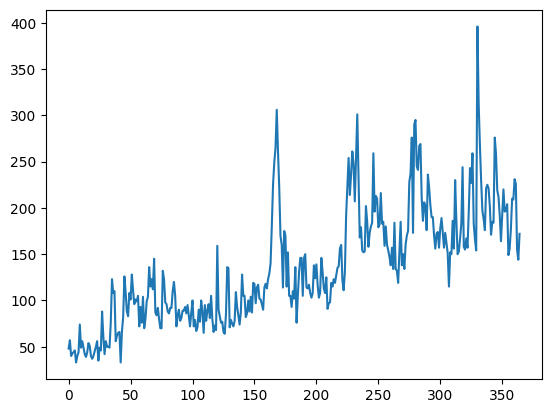

In [ ]:
subs.plot()

<Axes: xlabel='lead'>

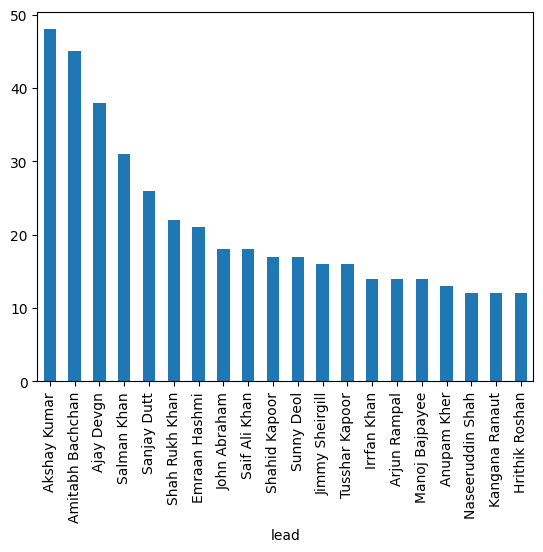

In [ ]:
movies.value_counts().head(20).plot(kind='bar')

<Axes: ylabel='count'>

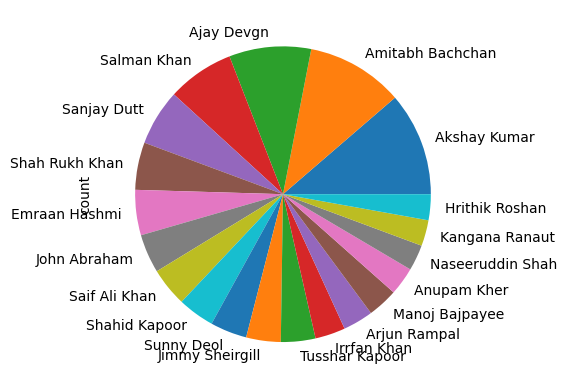

In [ ]:
movies.value_counts().head(20).plot(kind='pie')

## Important series methods

### ser.astype('new_datatype')
- Change the datatype of series.
- no permanent changes.

In [ ]:
import sys
sys.getsizeof(vk)

8000

In [ ]:
sys.getsizeof(vk.astype('int16'))

7570

### ser.between(start, end)
- returns boolean series including start and end.

In [ ]:
vk[vk.between(51, 99)]

match_no
34     58
41     71
44     56
45     67
52     70
57     57
68     73
71     51
73     58
74     65
80     57
81     93
82     99
85     56
97     67
99     73
103    51
104    62
110    82
116    75
117    79
119    80
122    52
127    75
129    54
131    54
132    62
134    64
137    55
141    58
144    57
145    92
148    68
152    70
160    84
162    67
175    72
178    90
188    72
197    51
198    53
209    58
213    73
Name: runs, dtype: int32

### ser.clip
- returns a series in which all the values are clipped in the given range.
- no change in original series

In [ ]:
subs.clip(100, 200)

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

### series.drop_duplicates(keep='first')
- return a series in which duplicated values are dropped.
- keep parameter decides which occurence to be included into series.
- by default it keeps first occurence.

In [ ]:
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [ ]:
temp.drop_duplicates()

0    1
2    2
4    3
6    4
dtype: int64

In [ ]:
temp.drop_duplicates(keep='last')

1    1
3    2
5    3
7    4
dtype: int64

### ser.duplicated()
- returns a boolean series, if values is duplicated it is true.

In [ ]:
temp.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [ ]:
temp.duplicated().sum()

4

### ser.size
- returns total values in the series

### ser.count()
- returns total not-NaN values 

In [ ]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [ ]:
temp.size

10

In [ ]:
temp.count()

7

### ser.isnull()
- returns a boolean series in which every element is checked whether is it null or not

In [ ]:
temp.isnull().sum()

3

### ser.dropna()
- returns a series after dropping all the Nan values.

In [ ]:
temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

### ser.fillna()
- returns a series in which NaN values are filled using some conditions

In [ ]:
temp.fillna(0)

0     1.0
1     2.0
2     3.0
3     0.0
4     5.0
5     6.0
6     0.0
7     8.0
8     0.0
9    10.0
dtype: float64

In [ ]:
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

### ser.isin(list_of_items)
- returns a boolean series which checks the elements of provided list are in the series or not

In [ ]:
vk[vk.isin([49, 99])]

match_no
82    99
86    49
Name: runs, dtype: int32

### ser.apply(func)
- returns series after applying the given function on all the values.

In [ ]:
movies.apply(lambda x: x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [ ]:
subs.apply(lambda x:'good day' if x>subs.mean() else 'bad day')

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

### ser.copy()
- copy the series

In [ ]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int32

In [ ]:
new = vk.head()
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int32

In [ ]:
new[1] = 100
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int32

In [ ]:
vk

match_no
1      100
2       23
3       13
4       12
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int32

In [ ]:
new = vk.head().copy()
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int32

In [ ]:
new[1] = 1
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int32

In [ ]:
vk

match_no
1      100
2       23
3       13
4       12
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int32

In [5]:
import numpy as np
import pandas as pd

# DataFrame

A DataFrame represents a rectangular table of data and contains an ordered, named
collection of columns, each of which can be a different value type (numeric, string,
Boolean, etc.). The DataFrame has both a row and column index; it can be thought of
as a dictionary of Series all sharing the same index.


## Creating DataFrame

| Type                        | Notes                                                                                             |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| 2D ndarray                  | A matrix of data, passing optional row and column labels                                          |
| Dictionary of arrays, lists, or tuples | Each sequence becomes a column in the DataFrame; all sequences must be the same length           |
| NumPy structured/record array | Treated as the “dictionary of arrays” case                                                       |
| Dictionary of Series        | Each value becomes a column; indexes from each Series are unioned together to form the result’s row index if no explicit index is passed |
| Dictionary of dictionaries  | Each inner dictionary becomes a column; keys are unioned to form the row index as in the “dictionary of Series” case |
| List of dictionaries or Series | Each item becomes a row in the DataFrame; unions of dictionary keys or Series indexes become the DataFrame’s column labels |
| List of lists or tuples     | Treated as the “2D ndarray” case                                                                  |
| Another DataFrame           | The DataFrame’s indexes are used unless different ones are passed                                 |
| NumPy MaskedArray           | Like the “2D ndarray” case except masked values are missing in the DataFrame result              |


### From Lists

In [6]:
student_data = [
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 50, 2]
]

pd.DataFrame(student_data, columns=['iq', 'marks', 'package'])

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,50,2


### From Dictionary

In [7]:
student_dict = {
    'name':['dilkush', 'ankit', 'neeraj', 'ritu', 'pankaj', 'pankaj'],
    'iq':[100, 90, 120, 80, 0, 0],
    'marks':[80, 70, 100, 50, 0, 0],
    'package':[10, 7, 14, 2, 0, 0]
}

students = pd.DataFrame(student_dict)
students

,name,iq,marks,package
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


Assigning names of index and columns

In [8]:
students.index.name = 'ser no.'
students.columns.name = 'details'

In [9]:
students

details,name,iq,marks,package
ser no.,,,,
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


Adding another column

In [10]:
students['age'] = np.nan

In [11]:
students

details,name,iq,marks,package,age
ser no.,,,,,
0,dilkush,100,80,10,NaN
1,ankit,90,70,7,NaN
2,neeraj,120,100,14,NaN
3,ritu,80,50,2,NaN
4,pankaj,0,0,0,NaN
5,pankaj,0,0,0,NaN


In [12]:
students['age'] = 20

In [13]:
students

details,name,iq,marks,package,age
ser no.,,,,,
0,dilkush,100,80,10,20
1,ankit,90,70,7,20
2,neeraj,120,100,14,20
3,ritu,80,50,2,20
4,pankaj,0,0,0,20
5,pankaj,0,0,0,20


In [14]:
del students['age']

In [15]:
students

details,name,iq,marks,package
ser no.,,,,
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


### From csv files

In [16]:
movies = pd.read_csv('movies.csv')
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [17]:
ipl = pd.read_csv('ipl-matches.csv')
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


## DataFrame Attributes and Methods

### DF.head(n=5)
- returns DF containing first n rows.
- if no n specified then by default n is 5

In [18]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


### DF.tail(n=5)
- same as DF.head(n), just returns last rows

In [19]:
ipl.tail()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [20]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
 "year": [2000, 2001, 2002, 2001, 2002, 2003],
 "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


`Note` - If you specify a sequence of columns, the DataFrame’s columns will be arranged in
that order:

In [21]:
pd.DataFrame(data, columns=['year', 'pop', 'state'])

,year,pop,state
0,2000,1.5,Ohio
1,2001,1.7,Ohio
2,2002,3.6,Ohio
3,2001,2.4,Nevada
4,2002,2.9,Nevada
5,2003,3.2,Nevada


### DF.shape
- returns tuple containing shape of DataFrame

In [22]:
movies.shape

(1629, 18)

In [23]:
ipl.shape

(950, 20)

### DF.dtypes 
- returns series containing datatype of each column

In [24]:
movies.dtypes

title_x              object
imdb_id              object
poster_path          object
wiki_link            object
title_y              object
original_title       object
is_adult              int64
year_of_release       int64
runtime              object
genres               object
imdb_rating         float64
imdb_votes            int64
story                object
summary              object
tagline              object
actors               object
wins_nominations     object
release_date         object
dtype: object

In [25]:
ipl.dtypes

ID                   int64
City                object
Date                object
Season              object
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin             float64
method              object
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
dtype: object

### DF.index
- returns RangeIndex object if index is not explicitely decided

In [26]:
movies.index

RangeIndex(start=0, stop=1629, step=1)

In [27]:
ipl.index

RangeIndex(start=0, stop=950, step=1)

### DF.columns
- returns Index object containing all column names

In [28]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [29]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

### DF.values
- returns numpy ndarray containig all the values

In [30]:
students.values

array([['dilkush', 100, 80, 10],
       ['ankit', 90, 70, 7],
       ['neeraj', 120, 100, 14],
       ['ritu', 80, 50, 2],
       ['pankaj', 0, 0, 0],
       ['pankaj', 0, 0, 0]], dtype=object)

In [31]:
ipl.values

array([[1312200, 'Ahmedabad', '2022-05-29', ...,
        "['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312199, 'Ahmedabad', '2022-05-27', ...,
        "['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",
        'CB Gaffaney', 'Nitin Menon'],
       [1312198, 'Kolkata', '2022-05-25', ...,
        "['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']",
        'J Madanagopal', 'MA Gough'],
       ...,
       [335984, 'Delhi', '2008-04-19', ...,
        "['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'MM Patel']",
        'Aleem Dar', 'GA Pratapkumar'],
    

### DF.sample(n=1)
- returns randomly selected n rows from the DF

In [32]:
ipl.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
660,548350,Bangalore,2012-05-02,2012,44,Royal Challengers Bangalore,Kings XI Punjab,M Chinnaswamy Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,4.0,NaN,Azhar Mahmood,"['MA Agarwal', 'CH Gayle', 'V Kohli', 'AB de V...","['Mandeep Singh', 'SE Marsh', 'N Saini', 'DJ H...",BF Bowden,C Shamshuddin
338,1082626,Chandigarh,2017-04-30,2017,36,Kings XI Punjab,Delhi Daredevils,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,field,N,Kings XI Punjab,Wickets,10.0,NaN,Sandeep Sharma,"['MJ Guptill', 'HM Amla', 'M Vohra', 'SE Marsh...","['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...",YC Barde,CK Nandan


### DF.info()
- returns DF containing various informations

In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [34]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

### DF.describe()
- only applies to numerical columns,
- returns DF containing various statistical info

In [35]:
movies.describe()

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


### DF.isnull()
- returns boolean DF, used with sum() to count total null values in each column of DF

In [36]:
movies.isnull().sum()

title_x                0
imdb_id                0
poster_path          103
wiki_link              0
title_y                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating            0
imdb_votes             0
story                 20
summary                0
tagline             1072
actors                 5
wins_nominations     922
release_date         107
dtype: int64

### DF.duplicated()
- return boolean DF

In [37]:
students.duplicated()

ser no.
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [38]:
students.duplicated().sum()

1

### DF.rename(columns={'existing_col_name':'new_col_name'}, inplace=False)
- used to rename the columns.
- inplace parameter used to make permanent changes into DF

In [39]:
students.rename(columns={'marks':'percent', 'package':'lpa'}, inplace=True)

In [40]:
students

details,name,iq,percent,lpa
ser no.,,,,
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


## Mathematical Operations on DF



Descriptive and summary statistics
| Method        | Description                                                                                                 |
|---------------|-------------------------------------------------------------------------------------------------------------|
| count         | Number of non-NA values                                                                                     |
| describe      | Compute set of summary statistics                                                                           |
| min, max      | Compute minimum and maximum values                                                                          |
| argmin, argmax | Compute index locations (integers) at which minimum or maximum value is obtained, respectively; not available on DataFrame objects |
| idxmin, idxmax | Compute index labels at which minimum or maximum value is obtained, respectively                           |
| quantile      | Compute sample quantile ranging from 0 to 1 (default: 0.5)                                                  |
| sum           | Sum of values                                                                                               |
| mean          | Mean of values                                                                                              |
| median        | Arithmetic median (50% quantile) of values                                                                  |
| mad           | Mean absolute deviation from mean value                                                                     |
| prod          | Product of all values                                                                                       |
| var           | Sample variance of values                                                                                   |
| std           | Sample standard deviation of values                                                                         |
| skew          | Sample skewness (third moment) of values                                                                    |
| kurt          | Sample kurtosis (fourth moment) of values                                                                   |
| cumsum        | Cumulative sum of values                                                                                    |
| cummin, cummax | Cumulative minimum or maximum of values, respectively                                                       |
| cumprod       | Cumulative product of values                                                                                |
| diff          | Compute first arithmetic difference (useful for time series)                                                |
| pct_change    | Compute percent changes                                                                                     |


In [41]:
students = pd.DataFrame([
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 50, 2],
    [0, 0, 0],
    [0, 0, 0]
], columns=['iq', 'percent', 'lpa'])

students

,iq,percent,lpa
0,100,80,10
1,90,70,7
2,120,100,14
3,80,50,2
4,0,0,0
5,0,0,0


### DF.reindex(['indexvalue1', 'indexvalue2])
- used to change the order of indexes,

In [42]:
students.reindex([1,2,5,4,0,3])

,iq,percent,lpa
1,90,70,7
2,120,100,14
5,0,0,0
4,0,0,0
0,100,80,10
3,80,50,2


### DF.sum(axis=0) / DF.max(axis) / DF.min(axis) / DF.mean(axis) / DF.median(axis) / DF.var(axis) / DF.std(axis)
- various operations on values along specified axis.
- by default axis is 0
- axis = 1 -> row-wise

In [43]:
students.sum(axis=1)

0    190
1    167
2    234
3    132
4      0
5      0
dtype: int64

In [44]:
students.max(axis=1) 

0    100
1     90
2    120
3     80
4      0
5      0
dtype: int64

In [45]:
students.min()

iq         0
percent    0
lpa        0
dtype: int64

In [46]:
students.mean(axis=1)

0    63.333333
1    55.666667
2    78.000000
3    44.000000
4     0.000000
5     0.000000
dtype: float64

In [47]:
students.var()

iq         2710.0
percent    1760.0
lpa          33.5
dtype: float64

In [48]:
students.std()

iq         52.057660
percent    41.952354
lpa         5.787918
dtype: float64

## Selecting

| Type | Notes |
|---------|-----------|
|df[column] | Select single column or sequence of columns from the DataFrame|
| df.loc[rows] | Select single row or subset of rows from the DataFrame by label |
| df.loc[:, cols] | Select single column or subset of columns by label |
| df.loc[rows, cols] | Select both row(s) and column(s) by label |
| df.iloc[rows] | Select single row or subset of rows from the DataFrame by integer position |
| df.iloc[:, cols] | Select single column or subset of columns by integer position |
| df.iloc[rows, cols] | Select both row(s) and column(s) by integer position |
| df.at[row, col] | Select a single scalar value by row and column label |
| df.iat[row, col] | Select a single scalar value by row and column position (integers) |
| reindex method | Select either rows or columns by labels |


## Selecting Columns

### Selecting single column from DF

In [49]:
movies['title_x']

0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
1624                   Tera Mera Saath Rahen
1625                    Yeh Zindagi Ka Safar
1626                         Sabse Bada Sukh
1627                                   Daaka
1628                                Humsafar
Name: title_x, Length: 1629, dtype: object

In [50]:
ipl['Venue']

0                Narendra Modi Stadium, Ahmedabad
1                Narendra Modi Stadium, Ahmedabad
2                           Eden Gardens, Kolkata
3                           Eden Gardens, Kolkata
4                        Wankhede Stadium, Mumbai
                          ...                    
945                                  Eden Gardens
946                              Wankhede Stadium
947                              Feroz Shah Kotla
948    Punjab Cricket Association Stadium, Mohali
949                         M Chinnaswamy Stadium
Name: Venue, Length: 950, dtype: object

### Selecting Multiple Columns from DF

In [51]:
movies[['year_of_release', 'actors', 'title_x']]

,year_of_release,actors,title_x
0,2019,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,Uri: The Surgical Strike
1,2019,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,Battalion 609
2,2019,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,The Accidental Prime Minister (film)
3,2019,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,Why Cheat India
4,2018,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,Evening Shadows
...,...,...,...
1624,2001,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,Tera Mera Saath Rahen
1625,2001,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,Yeh Zindagi Ka Safar
1626,2018,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,Sabse Bada Sukh
1627,2019,Gippy Grewal|Zareen Khan|,Daaka


In [52]:
ipl[['Team1', 'Team2', 'WinningTeam']]

,Team1,Team2,WinningTeam
0,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals
2,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore
3,Rajasthan Royals,Gujarat Titans,Gujarat Titans
4,Sunrisers Hyderabad,Punjab Kings,Punjab Kings
...,...,...,...
945,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders
946,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
947,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
948,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings


## Selecting Rows

- iloc - searches using index positions
- loc - searches using index labels


`Note -` iloc doesn't include last index while loc includes

In [53]:
student_dict = {
    'name':['dilkush', 'ankit', 'neeraj', 'ritu', 'pankaj', 'pankaj'],
    'iq':[100, 90, 120, 80, 0, 0],
    'marks':[80, 70, 100, 50, 0, 0],
    'package':[10, 7, 14, 2, 0, 0]
}

students = pd.DataFrame(student_dict)
students

,name,iq,marks,package
0,dilkush,100,80,10
1,ankit,90,70,7
2,neeraj,120,100,14
3,ritu,80,50,2
4,pankaj,0,0,0
5,pankaj,0,0,0


In [54]:
students.set_index('name', inplace=True)
students

,iq,marks,package
name,,,
dilkush,100,80,10
ankit,90,70,7
neeraj,120,100,14
ritu,80,50,2
pankaj,0,0,0
pankaj,0,0,0


### Single Row using iloc

In [55]:
movies.iloc[0]

title_x                                      Uri: The Surgical Strike
imdb_id                                                     tt8291224
poster_path         https://upload.wikimedia.org/wikipedia/en/thum...
wiki_link           https://en.wikipedia.org/wiki/Uri:_The_Surgica...
title_y                                      Uri: The Surgical Strike
original_title                               Uri: The Surgical Strike
is_adult                                                            0
year_of_release                                                  2019
runtime                                                           138
genres                                               Action|Drama|War
imdb_rating                                                       8.4
imdb_votes                                                      35112
story               Divided over five chapters  the film chronicle...
summary             Indian army special forces execute a covert op...
tagline             

### Multiple Rows using iloc

In [56]:
movies.iloc[5:16:2]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)
7,Bombairiya,tt4971258,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bombairiya,Bombairiya,Bombairiya,0,2019,104,Comedy|Crime|Drama,4.3,295,It follows the story of Meghna who gets embro...,It follows the story of Meghna who gets embro...,They didn't mean to change the world.,Radhika Apte|Akshay Oberoi|Siddhanth Kapoor|Ra...,NaN,18 January 2019 (India)
9,Thackeray (film),tt7777196,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Thackeray_(film),Thackeray,Thackeray,0,2019,120,Biography|Drama,5.1,2301,Balasaheb Thackrey works as a cartoonist for a...,Biographical account of Shiv Sena Supremo Bal...,NaN,Nawazuddin Siddiqui|Amrita Rao|Abdul Quadir Am...,NaN,25 January 2019 (India)
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA)
13,Total Dhamaal,tt7639372,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Total_Dhamaal,Total Dhamaal,Total Dhamaal,0,2019,130,Action|Adventure|Comedy,4.3,4817,Total Dhamaal is the third instalment in the D...,A group of people learn about a hidden treasur...,The Wildest Adventure Ever,Ajay Devgn|Madhuri Dixit|Anil Kapoor|Riteish D...,NaN,22 February 2019 (India)
15,Badla (2019 film),tt8130968,https://upload.wikimedia.org/wikipedia/en/0/0c...,https://en.wikipedia.org/wiki/Badla_(2019_film),Badla,Badla,0,2019,118,Crime|Drama|Mystery,7.9,15499,Naina Sethi a successful entrepreneur finds he...,A dynamic young entrepreneur finds herself loc...,NaN,Amitabh Bachchan|Taapsee Pannu|Amrita Singh|An...,1 win,8 March 2019 (India)


### Fancy Indexing using iloc

In [57]:
movies.iloc[[0, 4, 5]]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
5,Soni (film),tt6078866,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Soni_(film),Soni,Soni,0,2018,97,Drama,7.2,1595,Soni a young policewoman in Delhi and her su...,While fighting crimes against women in Delhi ...,NaN,Geetika Vidya Ohlyan|Saloni Batra|Vikas Shukla...,3 wins & 5 nominations,18 January 2019 (USA)


### Single Row using loc

In [58]:
students.loc['ritu']

iq         80
marks      50
package     2
Name: ritu, dtype: int64

### Multiple Rows using loc

In [59]:
students

,iq,marks,package
name,,,
dilkush,100,80,10
ankit,90,70,7
neeraj,120,100,14
ritu,80,50,2
pankaj,0,0,0
pankaj,0,0,0


In [60]:
students.loc['dilkush':'pankaj']

,iq,marks,package
name,,,
dilkush,100,80,10
ankit,90,70,7
neeraj,120,100,14
ritu,80,50,2
pankaj,0,0,0
pankaj,0,0,0


### Fancy Indexing using loc

In [61]:
students.loc[['dilkush', 'neeraj', 'ritu']]

,iq,marks,package
name,,,
dilkush,100,80,10
neeraj,120,100,14
ritu,80,50,2


## Selecting both Rows and Columns

In [62]:
movies.iloc[:3, :3]

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


In [63]:
movies.loc[:3, 'title_x':'poster_path']

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...


## Filtering a DF

In [64]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


1. Find all the final winners in ipl

In [65]:
ipl[ipl['MatchNumber']=='Final'][['Season', 'WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


2. How many super over finishes have occured.

In [66]:
ipl[ipl['SuperOver']=='Y'].shape[0]

14

3. How many matches has csk won in kolkata

In [67]:
ipl[(ipl['City']=='Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

5

4. Toss winner is match winner in percentage

In [68]:
(ipl[ipl['TossWinner'] == ipl['WinningTeam']]).shape[0]/ ipl.shape[0] * 100

51.473684210526315

5. Movies with rating higher than 8 and votes>10000

In [69]:
ipl[(movies['imdb_rating']>8) & (movies['imdb_votes']>10000)]

C:\Users\DILKHUSH\AppData\Local\Temp\ipykernel_15532\891066147.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ipl[(movies['imdb_rating']>8) & (movies['imdb_votes']>10000)]


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
11,1304109,Mumbai,2022-05-15,2022,63,Rajasthan Royals,Lucknow Super Giants,"Brabourne Stadium, Mumbai",Rajasthan Royals,bat,N,Rajasthan Royals,Runs,24.0,NaN,TA Boult,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['Q de Kock', 'KL Rahul', 'A Badoni', 'DJ Hood...",PG Pathak,Tapan Sharma
37,1304083,Mumbai,2022-04-24,2022,37,Lucknow Super Giants,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Lucknow Super Giants,Runs,36.0,NaN,KL Rahul,"['Q de Kock', 'KL Rahul', 'MK Pandey', 'MP Sto...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'SA ...",M Erasmus,HAS Khalid
40,1304080,Mumbai,2022-04-22,2022,34,Rajasthan Royals,Delhi Capitals,"Wankhede Stadium, Mumbai",Delhi Capitals,field,N,Rajasthan Royals,Runs,15.0,NaN,JC Buttler,"['JC Buttler', 'D Padikkal', 'SV Samson', 'SO ...","['PP Shaw', 'DA Warner', 'SN Khan', 'RR Pant',...",NA Patwardhan,Nitin Menon
143,1216502,NaN,2020-10-31,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
146,1216499,Abu Dhabi,2020-10-28,2020/21,48,Royal Challengers Bangalore,Mumbai Indians,Sheikh Zayed Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,SA Yadav,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['Q de Kock', 'Ishan Kishan', 'SA Yadav', 'SS ...",UV Gandhe,CB Gaffaney
325,1082639,Chandigarh,2017-05-09,2017,49,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association IS Bindra Stadium, ...",Kolkata Knight Riders,field,N,Kings XI Punjab,Runs,14.0,NaN,MM Sharma,"['MJ Guptill', 'M Vohra', 'SE Marsh', 'WP Saha...","['SP Narine', 'CA Lynn', 'G Gambhir', 'RV Utha...",A Nand Kishore,S Ravi
354,1082608,Delhi,2017-04-17,2017,18,Delhi Daredevils,Kolkata Knight Riders,Feroz Shah Kotla,Delhi Daredevils,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,NM Coulter-Nile,"['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...","['G Gambhir', 'C de Grandhomme', 'RV Uthappa',...",Nitin Menon,CK Nandan
418,980929,Rajkot,2016-04-21,2016,15,Gujarat Lions,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,NaN,B Kumar,"['AJ Finch', 'BB McCullum', 'SK Raina', 'KD Ka...","['DA Warner', 'S Dhawan', 'MC Henriques', 'EJG...",K Bharatan,HDPK Dharmasena
426,980913,Delhi,2016-04-15,2016,7,Delhi Daredevils,Kings XI Punjab,Feroz Shah Kotla,Delhi Daredevils,field,N,Delhi Daredevils,Wickets,8.0,NaN,A Mishra,"['Q de Kock', 'SS Iyer', 'SV Samson', 'P Negi'...","['M Vijay', 'M Vohra', 'SE Marsh', 'DA Miller'...",S Ravi,C Shamshuddin


6. Action movies with rating higher than 7.5

In [70]:
movies[(movies['genres'].str.contains('Action')) & (movies['imdb_rating']>7.5)]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
41,Family of Thakurganj,tt8897986,https://upload.wikimedia.org/wikipedia/en/9/99...,https://en.wikipedia.org/wiki/Family_of_Thakur...,Family of Thakurganj,Family of Thakurganj,0,2019,127,Action|Drama,9.4,895,The film is based on small town of North India...,The film is based on small town of North India...,NaN,Jimmy Sheirgill|Mahie Gill|Nandish Singh|Prana...,NaN,19 July 2019 (India)
84,Mukkabaaz,tt7180544,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Mukkabaaz,The Brawler,Mukkabaaz,0,2017,154,Action|Drama|Sport,8.1,5434,A boxer (Shravan) belonging to upper cast tra...,A boxer struggles to make his mark in the boxi...,NaN,Viineet Kumar|Jimmy Sheirgill|Zoya Hussain|Rav...,3 wins & 6 nominations,12 January 2018 (USA)
106,Raazi,tt7098658,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raazi,Raazi,Raazi,0,2018,138,Action|Drama|Thriller,7.8,20289,Hidayat Khan is the son of an Indian freedom f...,A Kashmiri woman agrees to marry a Pakistani a...,An incredible true story,Alia Bhatt|Vicky Kaushal|Rajit Kapoor|Shishir ...,21 wins & 26 nominations,11 May 2018 (USA)
110,Parmanu: The Story of Pokhran,tt6826438,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Parmanu:_The_Sto...,Parmanu: The Story of Pokhran,Parmanu: The Story of Pokhran,0,2018,129,Action|Drama|History,7.7,18292,Captain Ashwat Raina's efforts to turn India i...,Ashwat Raina and his teammates arrive in Pokhr...,1998| India: one secret operation| six Indians...,John Abraham|Boman Irani|Diana Penty|Anuja Sat...,NaN,25 May 2018 (USA)
112,Bhavesh Joshi Superhero,tt6129302,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Bhavesh_Joshi_Su...,Bhavesh Joshi Superhero,Bhavesh Joshi Superhero,0,2018,154,Action|Drama,7.6,4928,Bhavesh Joshi Superhero is an action film abou...,The origin story of Bhavesh Joshi an Indian s...,This year| justice will have a new name.,Harshvardhan Kapoor|Priyanshu Painyuli|Ashish ...,2 nominations,1 June 2018 (USA)
169,The Ghazi Attack,tt6299040,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Ghazi_Attack...,The Ghazi Attack,The Ghazi Attack,0,2017,116,Action|Thriller|War,7.6,10332,In 1971 amid rising tensions between India an...,A Pakistani submarine Ghazi plans to secretly...,The war you did not know about,Rana Daggubati|Kay Kay Menon|Atul Kulkarni|Om ...,1 win & 7 nominations,17 February 2017 (USA)
219,Raag Desh (film),tt6080746,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raagdesh,Raag Desh,Raag Desh,0,2017,135,Action|Drama|History,8.3,341,A period film based on the historic 1945 India...,A period film based on the historic 1945 India...,NaN,Kunal Kapoor|Amit Sadh|Mohit Marwah|Kenneth De...,NaN,28 July 2017 (India)
258,Irudhi Suttru,tt5310090,https://upload.wikimedia.org/wikipedia/en/f/fe...,https://en.wikipedia.org/wiki/Saala_Khadoos,Saala Khadoos,Saala Khadoos,0,2016,109,Action|Drama|Sport,7.6,10507,An under-fire boxing coach Prabhu is transfer...,The story of a former boxer who quits boxing f...,NaN,Madhavan|Ritika Singh|Mumtaz Sorcar|Nassar|Rad...,9 wins & 2 nominations,29 January 2016 (USA)
280,Laal Rang,tt5600714,NaN,https://en.wikipedia.org/wiki/Laal_Rang,Laal Rang,Laal Rang,0,2016,147,Action|Crime|Drama,8.0,3741,The friendship of two men is tested when thing...,The frie

7. write a function that can return the track record of 2 teams against each other.

## Adding new columns

### Adding completely new column

In [71]:
movies['country'] = 'India'

In [72]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India


### Adding columns from existing

In [73]:
movies.dropna(inplace=True)

In [74]:
movies['lead actor'] = movies['actors'].str.split('|').apply(lambda x:x[0])

In [75]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,country,lead actor
11,Gully Boy,tt2395469,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gully_Boy,Gully Boy,Gully Boy,0,2019,153,Drama|Music,8.2,22440,"Gully Boy is a film about a 22-year-old boy ""M...",A coming-of-age story based on the lives of st...,Apna Time Aayega!,Ranveer Singh|Alia Bhatt|Siddhant Chaturvedi|V...,6 wins & 3 nominations,14 February 2019 (USA),India,Ranveer Singh
34,Yeh Hai India,tt5525846,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Hai_India,Yeh Hai India,Yeh Hai India,0,2017,128,Action|Adventure|Drama,5.7,169,Yeh Hai India follows the story of a 25 years...,Yeh Hai India follows the story of a 25 years...,A Film for Every Indian,Gavie Chahal|Mohan Agashe|Mohan Joshi|Lom Harsh|,2 wins & 1 nomination,24 May 2019 (India),India,Gavie Chahal


## Important DataFrame Functions

### DF['col'].astype('new_datatype')

In [76]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [77]:
ipl['ID'] = ipl['ID'].astype('int32')

In [78]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int32  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [79]:
ipl['Season'] = ipl['Season'].astype('category')

In [80]:
ipl['Team1'] = ipl['Team1'].astype('category')
ipl['Team2'] = ipl['Team2'].astype('category')
ipl['WinningTeam'] = ipl['WinningTeam'].astype('category')

In [81]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    category
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    category
 6   Team2            950 non-null    category
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    category
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    object  
 1

### DF.value_counts
- Counts the frequency of values in the DF.
- Mostly used in Series rather than DF

In [82]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
Name: count, dtype: int64

In [83]:
marks = pd.DataFrame([
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 70, 14],
    [80, 70, 14]
], columns=['iq', 'marks', 'package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [84]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [85]:
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


1. Find which player has won most POTM in finals and qualifiers.

In [86]:
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

2. Toss decision plot

<Axes: ylabel='count'>

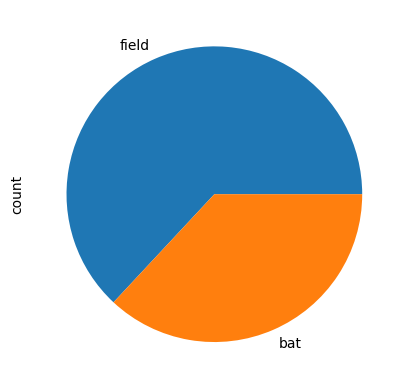

In [87]:
ipl['TossDecision'].value_counts().plot(kind='pie')

3. How many matches each team has played

In [88]:
ipl['Team1'].value_counts() + ipl['Team2'].value_counts()

Chennai Super Kings            208
Deccan Chargers                 75
Delhi Capitals                  63
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  16
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          223
Lucknow Super Giants            15
Mumbai Indians                 231
Pune Warriors                   46
Punjab Kings                    28
Rajasthan Royals               192
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    226
Sunrisers Hyderabad            152
Name: count, dtype: int64

### DF.sort_values('col', ascending=True, na_position='last', inplace=False)
- Sorts the Series or DataFrame based on values

In [89]:
x = pd.Series([12, 14, 1, 56, 89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [90]:
x.sort_values()

2     1
0    12
1    14
3    56
4    89
dtype: int64

In [91]:
movies = pd.read_csv('movies.csv')
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [92]:
movies.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [93]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [94]:
students.sort_values('name', na_position='first', inplace=False)

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0


### DF.sort_values(list_of_columns, ascending=list)

In [95]:
movies.sort_values(['year_of_release', 'title_x'], ascending=[True, False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


### Ser['col'].rank(ascending = False)

In [96]:
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [97]:
batsman['batsman_rank'] = batsman['batsman_run'].rank(ascending=False)

In [98]:
batsman.sort_values('batsman_rank')

,batter,batsman_run,batsman_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


### DF.sort_index(ascending=True)

In [99]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [100]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [101]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


### DF.set_index('col', inplace=False)
- Sets given column as index

In [102]:
batsman.set_index('batter', inplace=True)
batsman

,batsman_run,batsman_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


### DF.reset_index(inplace=False)
- resets the index.
- mostly used for transforming series into dataframe

In [103]:
batsman.reset_index(inplace=True)

In [104]:
batsman

,batter,batsman_run,batsman_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


`Note-` How to replace existing index without loosing? 

In [105]:
batsman.reset_index().set_index('batsman_rank')

,index,batter,batsman_run
batsman_rank,,,
166.5,0,A Ashish Reddy,280
226.0,1,A Badoni,161
535.0,2,A Chandila,4
329.0,3,A Chopra,53
402.5,4,A Choudhary,25
...,...,...,...
594.0,600,Yash Dayal,0
343.0,601,Yashpal Singh,47
547.5,602,Younis Khan,3


In [106]:
marks_series.reset_index()

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


### DF.rename(columns={'existing_name':'new_name'}, inplace=True)

In [107]:
movies.set_index('title_x', inplace=True)

In [108]:
movies.rename(columns={'imdb_id':'imdb', 'poster_path':'link'}, inplace=True)

In [109]:
movies

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


### Ser.unique()
- Returns ndarray array containing unique values

In [110]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5, np.nan,np.nan])
temp

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64

In [111]:
temp.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

### DF.unique()
- returns the total number of values excluding nan values
- `Note` - uniques includes nan values while nunique don't count them.

In [112]:
temp.nunique()

5

### DF['col'].isnull()
- checks every value of Series or DF whether it is null or not

In [113]:
students[students['name'].isnull()]

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.0,7.0
7,NaN,NaN,cse,10.0,9.0
9,NaN,git,NaN,NaN,NaN


### DF['col'].notnull()
- works same as isnull()
- only difference is that it returns True if values is not null otherwise False

In [114]:
students[students['name'].notnull()]

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


### DF['col'].hasnans
- used for checking the Nan in whole DF or series

In [115]:
students['name'].hasnans

True

### DF['col'].dropna(how='any', inplace=False)
- Drops the whole rows in which Nan is present.
- How parameter defines which row should be dropped.
1. if how is any it means if any of the values is nan then drop whole row
2. if how is all than row will be dropped if all values are nan

In [116]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [117]:
students.dropna()

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [118]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [119]:
students.dropna(subset=['name', 'college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


### DF['col'].fillna()
- Handling missing values

In [120]:
students['name'].fillna('unknown')

0        nitish
1         ankit
2        rupesh
3       unknown
4    mrityunjay
5       unknown
6       rishabh
7       unknown
8        aditya
9       unknown
Name: name, dtype: object

In [121]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

`Note-` There is another way to handle filling missing values, we can fill by previous value or upcoming value

In [122]:
students['name'].bfill()

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

In [123]:
students['name'].ffill()

0        nitish
1         ankit
2        rupesh
3        rupesh
4    mrityunjay
5    mrityunjay
6       rishabh
7       rishabh
8        aditya
9        aditya
Name: name, dtype: object

### DF.drop_duplicates(keep='first')
- droppes duplicated rows
- keep parameter tells which occurrence should be included.

In [124]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

In [125]:
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
], columns=['iq', 'marks', 'package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [126]:
marks.duplicated().sum()

1

In [127]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


Find the last match played by virat kohli in Delhi

In [128]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [129]:
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']

In [130]:
def did_kohli_play(players_list):
    return 'V Kohli' in players_list

ipl['did_kohli_played'] = ipl['all_players'].apply(did_kohli_play)

In [131]:
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_played'])].drop_duplicates(subset=['City', 'did_kohli_played'], keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_played
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


### DF.drop(index=[], columns=[])
- dropping specific rows

In [132]:
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [133]:
temp.drop(index=[0,6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [134]:
students.drop(columns=['branch', 'cgpa'])

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


### DF.apply(func)
- apply function on every value of the series or DF

In [135]:
temp = pd.Series([10, 20, 30, 40, 50])
temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [136]:
def sigmoid(val):
    return 1/1+np.exp(-val)

temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [2]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('imdb-top-1000.csv')
movies.head(1)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0


In [4]:
genres = movies.groupby('Genre')

In [5]:
genres

### Applying builtin aggregation functions on groupby objects

In [6]:
genres.min()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,300,1924,45,7.6,Abhishek Chaubey,Aamir Khan,25312,3296.0,33.0
Adventure,2001: A Space Odyssey,1925,88,7.6,Akira Kurosawa,Aamir Khan,29999,61001.0,41.0
Animation,Akira,1940,71,7.6,Adam Elliot,Adrian Molina,25229,128985.0,61.0
Biography,12 Years a Slave,1928,93,7.6,Adam McKay,Adrien Brody,27254,21877.0,48.0
Comedy,(500) Days of Summer,1921,68,7.6,Alejandro G. Iñárritu,Aamir Khan,26337,1305.0,45.0
Crime,12 Angry Men,1931,80,7.6,Akira Kurosawa,Ajay Devgn,27712,6013.0,47.0
Drama,1917,1925,64,7.6,Aamir Khan,Abhay Deol,25088,3600.0,28.0
Family,E.T. the Extra-Terrestrial,1971,100,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,7.9,F.W. Murnau,Max Schreck,57428,337574718.0,NaN


1. find the top 3 genres by total earning

In [10]:
movies.groupby('Genre').sum()['Gross'].sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [11]:
# Another way for same
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

2. Find the genre with highest avg IMDB rating

In [12]:
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(1)

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64

3. Find director with most popularity

In [17]:
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

4. Find the highest rating of movies in each genre.

In [18]:
movies.groupby('Genre')['IMDB_Rating'].max()

Genre
Action       9.0
Adventure    8.6
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.2
Drama        9.3
Family       7.8
Fantasy      8.1
Film-Noir    8.1
Horror       8.5
Mystery      8.4
Thriller     7.8
Western      8.8
Name: IMDB_Rating, dtype: float64

5. Find the number of movies done by each actor

In [19]:
# Using groupby()
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending=False)

Star1
Tom Hanks             12
Robert De Niro        11
Clint Eastwood        10
Al Pacino             10
Leonardo DiCaprio      9
                      ..
Glen Hansard           1
Giuseppe Battiston     1
Giulietta Masina       1
Gerardo Taracena       1
Ömer Faruk Sorak       1
Name: Series_Title, Length: 660, dtype: int64

In [20]:
# Using value_counts()
movies['Star1'].value_counts()

Star1
Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
                   ..
Preity Zinta        1
Javier Bardem       1
Ki-duk Kim          1
Vladimir Garin      1
Robert Donat        1
Name: count, Length: 660, dtype: int64

## Attributes and Methods

### len(DF.groupy('col'))
- Returns total number of groups.

In [21]:
len(movies.groupby('Genre'))

14

In [23]:
movies['Genre'].nunique()

14

### DF.groupby('col').size()
- Returns series where index is group name and value is the values belongs to that group.
- output is same as DF['col'].value_counts()

In [24]:
movies.groupby('Genre').size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

In [25]:
movies.groupby('Released_Year').size()

Released_Year
1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2017    22
2018    19
2019    23
2020     6
PG       1
Length: 100, dtype: int64

### DF.groupby('Col').first()/last()/nth(n)
- returns DF containing first or last or nth indexed values from each group.
- If any group has less values than n index than it ignores that group

In [26]:
genres = movies.groupby('Genre')
genres.first()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
Adventure,Interstellar,2014,169,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
Animation,Sen to Chihiro no kamikakushi,2001,125,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
Biography,Schindler's List,1993,195,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
Comedy,Gisaengchung,2019,132,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
Crime,The Godfather,1972,175,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
Drama,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
Family,E.T. the Extra-Terrestrial,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN


In [27]:
genres.last()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,Escape from Alcatraz,1979,112,7.6,Don Siegel,Clint Eastwood,121731,43000000.0,76.0
Adventure,Kelly's Heroes,1970,144,7.6,Brian G. Hutton,Clint Eastwood,45338,1378435.0,50.0
Animation,The Jungle Book,1967,78,7.6,Wolfgang Reitherman,Phil Harris,166409,141843612.0,65.0
Biography,Midnight Express,1978,121,7.6,Alan Parker,Brad Davis,73662,35000000.0,59.0
Comedy,Breakfast at Tiffany's,1961,115,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
Crime,The 39 Steps,1935,86,7.6,Alfred Hitchcock,Robert Donat,51853,302787539.0,93.0
Drama,Lifeboat,1944,97,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0
Family,Willy Wonka & the Chocolate Factory,1971,100,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Nosferatu,1922,94,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [28]:
genres.nth(6) # 7th values is at 6th index

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
16,Star Wars: Episode V - The Empire Strikes Back,1980,124,Action,8.7,Irvin Kershner,Mark Hamill,1159315,290475067.0,82.0
27,Se7en,1995,127,Crime,8.6,David Fincher,Morgan Freeman,1445096,100125643.0,65.0
32,It's a Wonderful Life,1946,130,Drama,8.6,Frank Capra,James Stewart,405801,82385199.0,89.0
66,WALL·E,2008,98,Animation,8.4,Andrew Stanton,Ben Burtt,999790,223808164.0,95.0
83,The Great Dictator,1940,125,Comedy,8.4,Charles Chaplin,Charles Chaplin,203150,288475.0,NaN
102,Braveheart,1995,178,Biography,8.3,Mel Gibson,Mel Gibson,959181,75600000.0,68.0
118,North by Northwest,1959,136,Adventure,8.3,Alfred Hitchcock,Cary Grant,299198,13275000.0,98.0
420,Sleuth,1972,138,Mystery,8.0,Joseph L. Mankiewicz,Laurence Olivier,44748,4081254.0,NaN
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0


### DF.groupby('col').get_group('group')
- returns DF containing specific values belonging to that column
- same output by column specific filtering

In [29]:
genres.get_group('Horror')

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
75,Alien,1979,117,Horror,8.4,Ridley Scott,Sigourney Weaver,787806,78900000.0,89.0
271,The Thing,1982,109,Horror,8.1,John Carpenter,Kurt Russell,371271,13782838.0,57.0
419,The Exorcist,1973,122,Horror,8.0,William Friedkin,Ellen Burstyn,362393,232906145.0,81.0
544,Night of the Living Dead,1968,96,Horror,7.9,George A. Romero,Duane Jones,116557,89029.0,89.0
707,The Innocents,1961,100,Horror,7.8,Jack Clayton,Deborah Kerr,27007,2616000.0,88.0
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0
844,Halloween,1978,91,Horror,7.7,John Carpenter,Donald Pleasence,233106,47000000.0,87.0
876,The Invisible Man,1933,71,Horror,7.7,James Whale,Claude Rains,30683,298791505.0,87.0
932,Saw,2004,103,Horror,7.6,James Wan,Cary Elwes,379020,56000369.0,46.0


### DF.groupby('col').groups
- Returns dictionary having group names as keys and index values belonging to that group as values in dictionary

In [31]:
genres.groups

{'Action': [2, 5, 8, 10, 13, 14, 16, 29, 30, 31, 39, 42, 44, 55, 57, 59, 60, 63, 68, 72, 106, 109, 129, 130, 134, 140, 142, 144, 152, 155, 160, 161, 166, 168, 171, 172, 177, 181, 194, 201, 202, 216, 217, 223, 224, 236, 241, 262, 275, 294, 308, 320, 325, 326, 331, 337, 339, 340, 343, 345, 348, 351, 353, 356, 357, 362, 368, 369, 375, 376, 390, 410, 431, 436, 473, 477, 479, 482, 488, 493, 496, 502, 507, 511, 532, 535, 540, 543, 564, 569, 570, 573, 577, 582, 583, 602, 605, 608, 615, 623, ...], 'Adventure': [21, 47, 93, 110, 114, 116, 118, 137, 178, 179, 191, 193, 209, 226, 231, 247, 267, 273, 281, 300, 301, 304, 306, 323, 329, 361, 366, 377, 402, 406, 415, 426, 458, 470, 497, 498, 506, 513, 514, 537, 549, 552, 553, 566, 576, 604, 609, 618, 638, 647, 675, 681, 686, 692, 711, 713, 739, 755, 781, 797, 798, 851, 873, 884, 912, 919, 947, 957, 964, 966, 984, 991], 'Animation': [23, 43, 46, 56, 58, 61, 66, 70, 101, 135, 146, 151, 158, 170, 197, 205, 211, 213, 219, 229, 230, 242, 245, 246, 270, 33

### DF.groupby('col').describe()
- applies specific statistical functions to numeric columns of each group

In [32]:
genres.describe()

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

### 

### DF.groupby('col').sample(n, replace=False)
- Returns n random samples from each group
- if the total values in a group is less than n then replace should be true because if samples is less than n then there will be error
- by default n is 1

In [33]:
genres.sample(2, replace=True)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
59,Avengers: Endgame,2019,181,Action,8.4,Anthony Russo,Joe Russo,809955,858373000.0,78.0
106,Aliens,1986,137,Action,8.3,James Cameron,Sigourney Weaver,652719,85160248.0,84.0
798,Interstate 60: Episodes of the Road,2002,116,Adventure,7.7,Bob Gale,James Marsden,29999,174381905.0,NaN
470,Hunt for the Wilderpeople,2016,101,Adventure,7.9,Taika Waititi,Sam Neill,111483,5202582.0,81.0
330,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248.0,78.0
43,The Lion King,1994,88,Animation,8.5,Roger Allers,Rob Minkoff,942045,422783777.0,88.0
18,Hamilton,2020,160,Biography,8.6,Thomas Kail,Lin-Manuel Miranda,55291,440984783.0,90.0
940,Finding Neverland,2004,106,Biography,7.6,Marc Forster,Johnny Depp,198677,51680613.0,67.0
687,The King of Comedy,1982,109,Comedy,7.8,Martin Scorsese,Robert De Niro,88511,2500000.0,73.0
379,Yeopgijeogin geunyeo,2001,137,Comedy,8.0,Jae-young Kwak,Tae-Hyun Cha,45403,772721890.0,NaN


### DF.groupby('col').nunique()
- unique values in each column of each group in form of DF

In [35]:
genres.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


## passing aggregation methods as dict

### DF.goupby('col').agg({'col':'agg_func'})
- Apply specific aggregation functions of specific columns of each group
- We can apply more than one agg func on one column.

In [36]:
genres.agg({
    'Runtime':'mean',
    'IMDB_Rating':'mean',
    'No_of_Votes':'sum',
    'Gross':'sum',
    'Metascore':'max'
})

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,72282412,3.263226e+10,98.0
Adventure,134.111111,7.937500,22576163,9.496922e+09,100.0
Animation,99.585366,7.930488,21978630,1.463147e+10,96.0
Biography,136.022727,7.938636,24006844,8.276358e+09,97.0
Comedy,112.129032,7.901290,27620327,1.566387e+10,99.0
Crime,126.392523,8.016822,33533615,8.452632e+09,100.0
Drama,124.737024,7.957439,61367304,3.540997e+10,100.0
Family,107.500000,7.800000,551221,4.391106e+08,91.0
Fantasy,85.000000,8.000000,146222,7.827267e+08,NaN


In [38]:
genres.agg({
    'Runtime':['min', 'mean'],
    'IMDB_Rating':'mean',
    'No_of_Votes':['sum', 'max'],
    'Gross':'sum',
    'Metascore':'max'
})

Runtime             IMDB_Rating No_of_Votes                  Gross  \
              min        mean        mean         sum      max           sum   
Genre                                                                          
Action         45  129.046512    7.949419    72282412  2303232  3.263226e+10   
Adventure      88  134.111111    7.937500    22576163  1512360  9.496922e+09   
Animation      71   99.585366    7.930488    21978630   999790  1.463147e+10   
Biography      93  136.022727    7.938636    24006844  1213505  8.276358e+09   
Comedy         68  112.129032    7.901290    27620327   939631  1.566387e+10   
Crime          80  126.392523    8.016822    33533615  1826188  8.452632e+09   
Drama          64  124.737024    7.957439    61367304  2343110  3.540997e+10   
Family        100  107.500000    7.800000      551221   372490  4.391106e+08   
Fantasy        76   85.000000    8.000000      146222    88794  7.827267e+08   
Film-Noir     100  104.000000    7.966667      367215   158731  1.259105e+08   
Horror         71  102.090909    7.909091     3742556   787806  1.034649e+09   
Mystery        96  119.083333    7.975000     4203004  1129894  1.256417e+09   
Thriller      108  108.000000    7.800000       27733    27733  1.755074e+07   
Western       132  148.250000    8.350000     1289665   688390  5.822151e+07   

          Metascore  
                max  
Genre                
Action         98.0  
Adventure     100.0  
Animation      96.0  
Biography      97.0  
Comedy         99.0  
Crime         100.0  
Drama         100.0  
Family         91.0  
Fantasy         NaN  
Film-Noir      97.0  
Horror         97.0  
Mystery       100.0  
Thriller       81.0  
Western        90.0

Highest rated movie from each group

In [41]:
temp = pd.DataFrame(columns=movies.columns)
for group, data in genres:
    temp = temp.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
temp

AttributeError: 'DataFrame' object has no attribute 'append'

## Split Apply Combine

### DF.groupby('col').apply(func, include_groups=False)

In [45]:
genres.apply(np.minimum.reduce, include_groups=False)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,300,1924,45,7.6,Abhishek Chaubey,Aamir Khan,25312,3296.0,NaN
Adventure,2001: A Space Odyssey,1925,88,7.6,Akira Kurosawa,Aamir Khan,29999,61001.0,NaN
Animation,Akira,1940,71,7.6,Adam Elliot,Adrian Molina,25229,128985.0,NaN
Biography,12 Years a Slave,1928,93,7.6,Adam McKay,Adrien Brody,27254,21877.0,NaN
Comedy,(500) Days of Summer,1921,68,7.6,Alejandro G. Iñárritu,Aamir Khan,26337,1305.0,NaN
Crime,12 Angry Men,1931,80,7.6,Akira Kurosawa,Ajay Devgn,27712,6013.0,NaN
Drama,1917,1925,64,7.6,Aamir Khan,Abhay Deol,25088,3600.0,NaN
Family,E.T. the Extra-Terrestrial,1971,100,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,7.9,F.W. Murnau,Max Schreck,57428,337574718.0,NaN


In [46]:
def foo(group):
    return group['Series_Title'].str.startswith('A').sum()

In [48]:
genres.apply(foo, include_groups=False)

Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

Find ranking of each movie in the group according to IMDB rating

In [50]:
def rank_movie(group):
    group['genre_rank'] = group['IMDB_Rating'].rank(ascending=False)
    return group

In [51]:
genres.apply(rank_movie, include_groups=False)

Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime  IMDB_Rating           Director              Star1  \
Genre                                                                      
Action   2        152          9.0  Christopher Nolan     Christian Bale   
         5        201          8.9      Peter Jackson        Elijah Wood   
         8        148          8.8  Christopher Nolan  Leonardo DiCaprio   
         10       178          8.8      Peter Jackson        Elijah Wood   
         13       179          8.7      Peter Jackson        Elijah Wood   
...               ...          ...                ...                ...   
Thriller 700      108          7.8      Terence Young     Audrey Hepburn   
Western  12       161          8.8       Sergio Leone     Clint Eastwood   
         48       165          8.5       Sergio Leone        Henry Fonda   
         115      132          8.3       Sergio Leone     Clint Eastwood   
         691      135          7.8     Clint Eastwood     Clint Eastwood   

              No_of_Votes        Gross  Metascore  genre_rank  
Genre                                                          
Action   2        2303232  534858444.0       84.0         1.0  
         5        1642758  377845905.0       94.0         2.0  
         8        2067042  292576195.0       74.0         3.5  
         10       1661481  315544750.0       92.0         3.5  
         13       1485555  342551365.0       87.0         6.0  
...                   ...          ...        ...         ...  
Thriller 700        27733   17550741.0       81.0         1.0  
Western  12        688390    6100000.0       90.0         1.0  
         48        302844    5321508.0       80.0         2.0  
         115       232772   15000000.0       74.0         3.0  
         691        65659   31800000.0       69.0         4.0  

[1000 rows x 10 columns]

Find normalized IMDB rating group wise

In [52]:
def normalizer(group):
    group['norm_rating'] = (group['IMDB_Rating'] - group['IMDB_Rating'].min())/(group['IMDB_Rating'].max() - group['IMDB_Rating'].min())
    return group

## Groupby on multiple columns

In [55]:
duo = movies.groupby(['Director', 'Star1'])
duo

In [57]:
duo.size()

Director             Star1         
Aamir Khan           Amole Gupte       1
Aaron Sorkin         Eddie Redmayne    1
Abdellatif Kechiche  Léa Seydoux       1
Abhishek Chaubey     Shahid Kapoor     1
Abhishek Kapoor      Amit Sadh         1
                                      ..
Zaza Urushadze       Lembit Ulfsak     1
Zoya Akhtar          Hrithik Roshan    1
                     Vijay Varma       1
Çagan Irmak          Çetin Tekindor    1
Ömer Faruk Sorak     Cem Yilmaz        1
Length: 898, dtype: int64

In [58]:
duo.get_group(('Aaron Sorkin', 'Eddie Redmayne'))

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
612,The Trial of the Chicago 7,2020,129,Drama,7.8,Aaron Sorkin,Eddie Redmayne,89896,853090410.0,77.0


Find most earning actor - director combo

In [59]:
duo['Gross'].sum().sort_values(ascending=False).head(1)

Director        Star1         
Akira Kurosawa  Toshirô Mifune    2.999877e+09
Name: Gross, dtype: float64

Find the bes actor-genre combo based on metascore

In [62]:
movies.groupby(['Star1', 'Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False).head(1)

,Star1,Genre,Metascore
230,Ellar Coltrane,Drama,100.0


## Exercises

In [63]:
ipl = pd.read_csv('deliveries1.csv')
ipl.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [64]:
ipl.shape

(179078, 21)

1. Find the top 10 batsman in terms of runs

In [65]:
ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

2. Find the batsman with max no of sixes

In [71]:
six = ipl[ipl['batsman_runs'] == 6]
six.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(1)

batsman
CH Gayle    1962
Name: batsman_runs, dtype: int64

3. Find batsman with most number of 4s and 6s in last 5 overs

In [77]:
last_overs = ipl[ipl['over'] > 15]
last_overs[(last_overs['batsman_runs'] == 4) | (last_overs['batsman_runs']==6)].groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1)

batsman
MS Dhoni    340
Name: batsman, dtype: int64

4. Virat Kohli's runs against all the teams

In [79]:
temp_df = ipl[ipl['batsman'] == 'V Kohli']
temp_df.groupby('bowling_team')['batsman_runs'].sum().reset_index()

,bowling_team,batsman_runs
0,Chennai Super Kings,749
1,Deccan Chargers,306
2,Delhi Capitals,66
3,Delhi Daredevils,763
4,Gujarat Lions,283
5,Kings XI Punjab,636
6,Kochi Tuskers Kerala,50
7,Kolkata Knight Riders,675
8,Mumbai Indians,628
9,Pune Warriors,128


5. Highest score of any batsman

In [80]:
def highest(batsman):
    temp_df = ipl[ipl['batsman'] == batsman]
    return temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]

In [81]:
highest('V Kohli')

113

In [1]:
import numpy as np
import pandas as pd

In [69]:
courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
nov = pd.read_csv('reg-month1.csv')
dec = pd.read_csv('reg-month2.csv')

In [5]:
nov

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [6]:
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


## Concating DataFrames

In [9]:
regs = pd.concat([nov, dec], ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


### Multiindex DataFrame

In [10]:
pd.concat([nov, dec], keys=['Nov', 'Dec'])

student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [11]:
pd.concat([nov, dec], axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


## Join

### Inner Join

In [12]:
students.merge(regs, how='inner', on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


### Left Join

In [13]:
courses.merge(regs, how='left', on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


### Right Join

In [15]:
temp = pd.DataFrame({
    'student_id':[26, 27, 28],
    'name':['Nitish', 'Ankit', 'Rahul'],
    'partner':[28, 26, 27]
})

students = pd.concat([students, temp], ignore_index=True)

In [18]:
students.merge(regs, how='right', on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


### Outer Join

In [20]:
students.merge(regs, how='outer', on='student_id').tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Nitish,28.0,NaN
58,27,Ankit,26.0,NaN
59,28,Rahul,27.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0
62,50,NaN,NaN,8.0


1. Find total revenue generated

In [22]:
regs.merge(courses, how='inner', on='course_id')['price'].sum()

154247

2. Find month by month revenue

In [30]:
temp = pd.concat([nov, dec], keys=['Nov', 'Dec']).reset_index()
temp.merge(courses, how='inner', on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

3. Print the registration table with cols name, course, price

In [32]:
students.merge(regs, on='student_id').merge(courses, on='course_id')[['name', 'course_name', 'price']]

,name,course_name,price
0,Kailash Harjo,python,2499
1,Kailash Harjo,power bi,1899
2,Kailash Harjo,pyspark,2499
3,Kailash Harjo,plotly,699
4,Esha Butala,tableau,2499
5,Parveen Bhalla,data analysis,4999
6,Parveen Bhalla,tableau,2499
7,Tarun Thaker,pandas,1099
8,Tarun Thaker,pyspark,2499
9,Tarun Thaker,ms sxcel,1599


4. Plot bar chart for revenue/courses

<Axes: xlabel='course_name'>

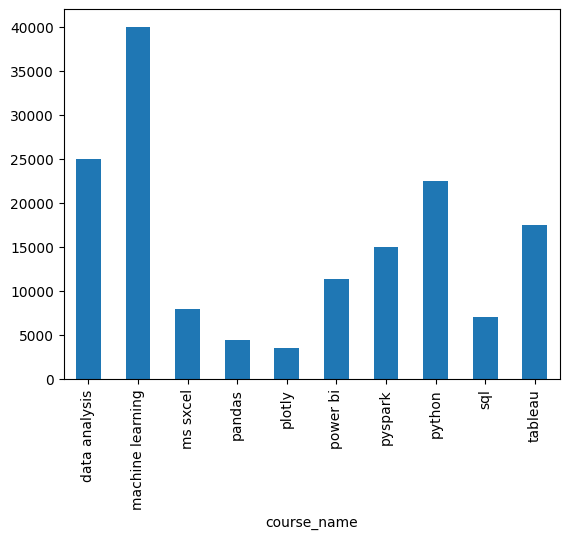

In [40]:
regs.merge(courses, on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

5. Find students who enrolled in both the months

In [43]:
common_students = np.intersect1d(nov['student_id'], dec['student_id'])
students[students['student_id'].isin(common_students)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


6. Find course that got no enrollment

In [46]:
course_id = np.setdiff1d(courses['course_id'], regs['course_id'])
courses[courses['course_id'].isin(course_id)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


7. Find students who did not enrolled into any of the courses

In [48]:
student_id = np.setdiff1d(students['student_id'], regs['student_id'])
students[students['student_id'].isin(student_id)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,27


8. Print student name and partner name for all enrolled students

In [52]:
students.merge(students, left_on='student_id', right_on='partner')[['name_x', 'name_y']]

,name_x,name_y
0,Kailash Harjo,Esha Butala
1,Esha Butala,Shashank D’Alia
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Nitika Chatterjee
4,Kusum Bahri,Radheshyam Dey
5,Lakshmi Contractor,Kusum Bahri
6,Tarun Thaker,Yasmin Palan
7,Radheshyam Dey,Aayushman Sant
8,Nitika Chatterjee,Tarun Thaker
9,Aayushman Sant,Lakshmi Contractor


9. Find top 3 students who did most number enrollments

In [56]:
top3students= regs.value_counts('student_id').head(3).reset_index()
top3students.merge(students, on='student_id')

,student_id,count,name,partner
0,23,6,Chhavi Lachman,18
1,7,5,Tarun Thaker,9
2,1,4,Kailash Harjo,23


In [63]:
regs.merge(students, on='student_id').groupby(['student_id', 'name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

10. Find top 3 students who spent most amount of money on courses

In [68]:
regs.merge(students, on='student_id').merge(courses, on='course_id').groupby(['student_id', 'name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

## Practise

1. Find top 3 stadiums with highest sixes/match ratio

In [71]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [74]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [75]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [81]:
temp = delivery.merge(matches, left_on='match_id', right_on='id')
temp.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [84]:
six = temp[temp['batsman_runs'] == 6]
six.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
47,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [88]:
num_sixes = six.groupby('venue')['venue'].count()

In [89]:
num_matches = matches['venue'].value_counts()

In [90]:
(num_sixes/num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

2. Find orange cap holder of all the seasons

In [95]:
temp.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs', ascending=False).drop_duplicates(subset=['season']).sort_values('season
                                                                                                                                                                    ')

,season,batsman,batsman_runs
1383,2016,V Kohli,973
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
1088,2014,RV Uthappa,660
1422,2017,DA Warner,641
446,2010,SR Tendulkar,618
115,2008,SE Marsh,616
502,2011,CH Gayle,608
229,2009,ML Hayden,572
1148,2015,DA Warner,562


# Multiindex

In [1]:
import numpy as np
import pandas as pd

### Series -> 1D DataFrame -> 2D

In [3]:
index_val = [('cse',2019), ('cse',2020), ('cse',2021), ('cse',2022), ('ece',2019), ('ece',2020), ('ece',2021), ('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8], index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

### The Problem

In [5]:
a['cse']

KeyError: 'cse'

### The Solution - Multiindex

## Creating Multiindex Series

#### 1. pd.MultiIndex.from_tuples()

In [6]:
index_val = [('cse',2019), ('cse',2020), ('cse',2021), ('cse',2022), ('ece',2019), ('ece',2020), ('ece',2021), ('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

#### 2. pd.MultiIndex.from_product()

In [7]:
pd.MultiIndex.from_product([['cse', 'ece'], [2019, 2020, 2021, 2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

#### level inside MultiIndex object

In [8]:
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [9]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [10]:
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

### Creating Series with MultiIndex object

In [13]:
s = pd.Series([1,2,3,4,5,6,7,8], index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [14]:
# Fetching items
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [15]:
s['cse',2020]

2

## MultiIndex DataFrame

In [16]:
branch_df = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16]
    ],
    index=multiindex,
    columns=['avg_pkg', 'students']
)

branch_df

avg_pkg  students
cse 2019        1         2
    2020        3         4
    2021        5         6
    2022        7         8
ece 2019        9        10
    2020       11        12
    2021       13        14
    2022       15        16

In [17]:
branch_df.loc['cse']

,avg_pkg,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [23]:
branch_df.loc['cse', 2019]

avg_pkg     1
students    2
Name: (cse, 2019), dtype: int64

In [24]:
branch_df['avg_pkg']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_pkg, dtype: int64

#### Another perspective

In [25]:
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0]
    ],
    index= [2019, 2020, 2021, 2022],
    columns= pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_pkg', 'students']])
)

branch_df2

delhi           mumbai         
     avg_pkg students avg_pkg students
2019       1        2       0        0
2020       3        4       0        0
2021       5        6       0        0
2022       7        8       0        0

In [26]:
branch_df2['delhi']['avg_pkg']

2019    1
2020    3
2021    5
2022    7
Name: avg_pkg, dtype: int64

In [29]:
branch_df2.loc[2022]

delhi   avg_pkg     7
        students    8
mumbai  avg_pkg     0
        students    0
Name: 2022, dtype: int64

#### MultiIndex DF in terms of both cols and index

In [30]:
branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0]
    ],
    index=multiindex,
    columns= pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_pkg', 'students']])
)

branch_df3

delhi           mumbai         
         avg_pkg students avg_pkg students
cse 2019       1        2       0        0
    2020       3        4       0        0
    2021       5        6       0        0
    2022       7        8       0        0
ece 2019       9       10       0        0
    2020      11       12       0        0
    2021      13       14       0        0
    2022      15       16       0        0

## Stacking and Unstacking
- Stacking - last level of col transform into last level of index.
- Unstacking - last level of index transform into last level of col.

In [34]:
branch_df3.stack(future_stack=True)

delhi  mumbai
cse 2019 avg_pkg       1       0
         students      2       0
    2020 avg_pkg       3       0
         students      4       0
    2021 avg_pkg       5       0
         students      6       0
    2022 avg_pkg       7       0
         students      8       0
ece 2019 avg_pkg       9       0
         students     10       0
    2020 avg_pkg      11       0
         students     12       0
    2021 avg_pkg      13       0
         students     14       0
    2022 avg_pkg      15       0
         students     16       0

In [35]:
branch_df3.unstack()

delhi                                         mumbai                 \
    avg_pkg                students                avg_pkg                  
       2019 2020 2021 2022     2019 2020 2021 2022    2019 2020 2021 2022   
cse       1    3    5    7        2    4    6    8       0    0    0    0   
ece       9   11   13   15       10   12   14   16       0    0    0    0   

                             
    students                 
        2019 2020 2021 2022  
cse        0    0    0    0  
ece        0    0    0    0

`Note -` MultiIndex DataFrame is also DataFrame so all the operations which can be performed on Normal DataFrame can also be performed on the MultiIndex DataFrame

### Extracting Single Row

In [39]:
branch_df3

delhi           mumbai         
         avg_pkg students avg_pkg students
cse 2019       1        2       0        0
    2020       3        4       0        0
    2021       5        6       0        0
    2022       7        8       0        0
ece 2019       9       10       0        0
    2020      11       12       0        0
    2021      13       14       0        0
    2022      15       16       0        0

In [38]:
branch_df3.loc[('cse',2020)]

delhi   avg_pkg     3
        students    4
mumbai  avg_pkg     0
        students    0
Name: (cse, 2020), dtype: int64

In [51]:
branch_df3.iloc[1]

delhi   avg_pkg     3
        students    4
mumbai  avg_pkg     0
        students    0
Name: (cse, 2020), dtype: int64

### Extracting Multiple Rows

In [43]:
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi           mumbai         
         avg_pkg students avg_pkg students
cse 2019       1        2       0        0
    2021       5        6       0        0
ece 2019       9       10       0        0

In [52]:
branch_df3.iloc[0:5:2]

delhi           mumbai         
         avg_pkg students avg_pkg students
cse 2019       1        2       0        0
    2021       5        6       0        0
ece 2019       9       10       0        0

### Extracting Columns

In [56]:
branch_df3['delhi']['avg_pkg']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_pkg, dtype: int64

In [57]:
branch_df3.iloc[:, 0]

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: (delhi, avg_pkg), dtype: int64

### Extracting Rows and Cols

In [58]:
branch_df3.iloc[[0,4], [1,2]]

,,delhi,mumbai
,,students,avg_pkg
cse,2019,2,0
ece,2019,10,0


In [59]:
branch_df3.iloc[[2,6], [0,2]]

,,delhi,mumbai
,,avg_pkg,avg_pkg
cse,2021,5,0
ece,2021,13,0


### Sort_index(ascending=True)

In [60]:
branch_df3.sort_index(ascending=False)

delhi           mumbai         
         avg_pkg students avg_pkg students
ece 2022      15       16       0        0
    2021      13       14       0        0
    2020      11       12       0        0
    2019       9       10       0        0
cse 2022       7        8       0        0
    2021       5        6       0        0
    2020       3        4       0        0
    2019       1        2       0        0

In [61]:
branch_df3.sort_index(ascending=[True, False])

delhi           mumbai         
         avg_pkg students avg_pkg students
cse 2022       7        8       0        0
    2021       5        6       0        0
    2020       3        4       0        0
    2019       1        2       0        0
ece 2022      15       16       0        0
    2021      13       14       0        0
    2020      11       12       0        0
    2019       9       10       0        0

In [62]:
branch_df3.sort_index(level=0, ascending=False)

delhi           mumbai         
         avg_pkg students avg_pkg students
ece 2022      15       16       0        0
    2021      13       14       0        0
    2020      11       12       0        0
    2019       9       10       0        0
cse 2022       7        8       0        0
    2021       5        6       0        0
    2020       3        4       0        0
    2019       1        2       0        0

#### DF.transpose()

In [63]:
branch_df3.transpose()

cse                 ece               
                2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_pkg     1    3    5    7    9   11   13   15
       students    2    4    6    8   10   12   14   16
mumbai avg_pkg     0    0    0    0    0    0    0    0
       students    0    0    0    0    0    0    0    0

#### DF.swaplevel(axis=0)

In [70]:
branch_df3.swaplevel(axis=1)

avg_pkg students avg_pkg students
           delhi    delhi  mumbai   mumbai
cse 2019       1        2       0        0
    2020       3        4       0        0
    2021       5        6       0        0
    2022       7        8       0        0
ece 2019       9       10       0        0
    2020      11       12       0        0
    2021      13       14       0        0
    2022      15       16       0        0

### Long Vs Wide Data
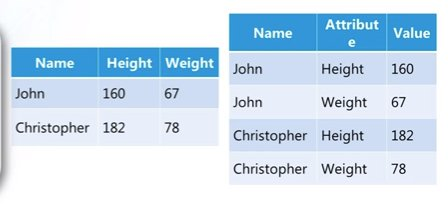

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

## DF.melt()
#### DF.melt(id_vars='cols_to_keep_as_it_is', var_name='name', value_name='name')
- Wide to Long

In [72]:
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [75]:
temp = pd.DataFrame({'cse':[120], 'ece':[100], 'mech':[50]})
temp

,cse,ece,mech
0,120,100,50


In [76]:
temp.melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [77]:
temp.melt(var_name='branch', value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [80]:
temp = pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

temp

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [81]:
temp.melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [96]:
death = pd.read_csv('time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')

death.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595


In [97]:
death = death.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'], var_name='date', value_name='num_deaths')
print(death.shape)
death.head(2)

(311253, 6)


,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [98]:
confirm = confirm.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'], var_name='date', value_name='num_confirmed')
print(confirm.shape)
confirm.head(2)

(311253, 6)


,Province/State,Country/Region,Lat,Long,date,num_confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [100]:
confirm.merge(death, on=['Province/State','Country/Region', 'Lat', 'Long', 'date'])[['Country/Region', 'date', 'num_confirmed', 'num_deaths']]

,Country/Region,date,num_confirmed,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


## Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.groupby(['sex', 'smoker'], observed=False)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [5]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=False)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


#### Multidimensional Pivot Tables

In [8]:
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc={'size':'mean', 'tip':'max', 'total_bill':'sum'}, observed=False)

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

#### Margins
- Additional Rows and Cols containing sum of rows and cols

In [10]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', observed=False, margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


#### Plotting Graphs

In [23]:
df = pd.read_csv('expense_data.csv')
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [24]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [27]:
df['month'] = df['Date'].dt.month_name()

In [28]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March


<Axes: xlabel='month'>

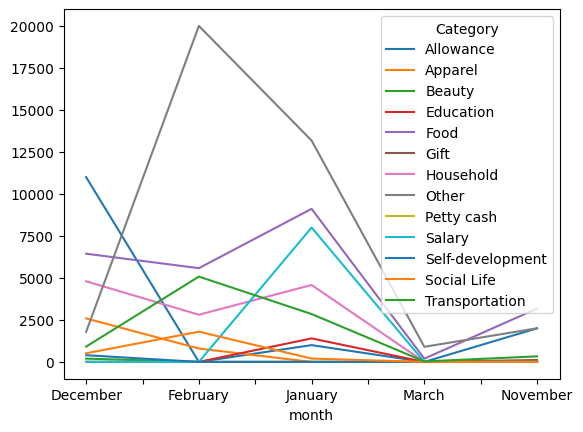

In [29]:
df.pivot_table(index='month', columns='Category', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='month'>

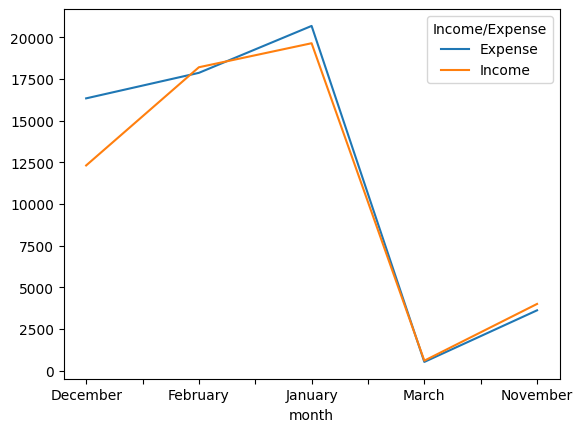

In [30]:
df.pivot_table(index='month', columns='Income/Expense', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='month'>

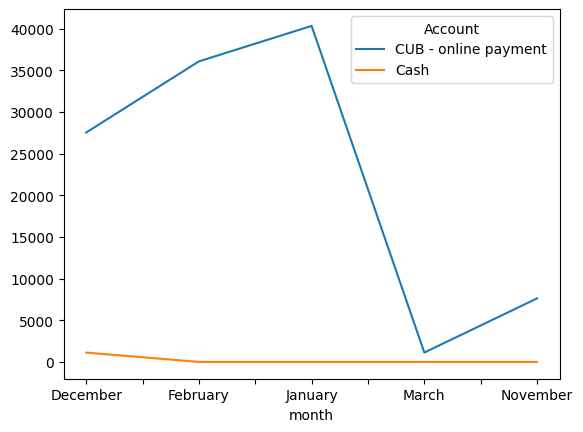

In [32]:
df.pivot_table(index='month', columns='Account', values='INR', aggfunc='sum', fill_value=0).plot()

In [1]:
import numpy as np
import pandas as pd

### Vectorized Operations

In [3]:
a = np.array([1,2,3,4])
a * 4

array([ 4,  8, 12, 16])

#### The problem with vectorized operations.

In [4]:
s = ['cat', 'mat', None, 'rat']
[i.startswith('c') for i in s]

AttributeError: 'NoneType' object has no attribute 'startswith'

#### How Pandas solves this issue?

- .str is string accessor.
- it is fast and optimized in compare to traditional python code

In [5]:
s = pd.Series(['cat', 'mat', None, 'rat'])

s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [6]:
df = pd.read_csv('titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Common Functions

### DF['col'].str.upper()
- Change to uppercase

In [8]:
df['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

### DF['col'].str.lower()
- change to lowercase

In [9]:
df['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

### DF['col'].str.capitalize()
- change first letter of the first word into uppercase

In [10]:
df['Name'].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

### DF['col'].str.title()
- Change first letter of every word into uppercase

In [11]:
df['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### DF['col'].str.len()
- Returns length of the string

In [12]:
df['Name'].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

### str.strip('char')
- Remove unwanted trailing characters

In [20]:
"---,,--,-Khush-   ---,,,--".strip('-, ')

'Khush'

In [21]:
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### DF['col'].str.split('char')
- Splits the string based on the char

In [27]:
df['lastname'] = df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [34]:
df[['title', 'firstname']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n=1, expand=True)
df['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

### DF['col'].str.replace('existing_str', 'new_str')
- Replace the string

In [36]:
df['title'] = df['title'].str.replace('Ms.', 'Miss.')
df['title'] = df['title'].str.replace('Mlle.', 'Miss.')

In [37]:
df['title'].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

## Filtering

### DF['col'].str.startswith('char')
 - Check each string whether it starts with specific char or not


In [39]:
df[df['firstname'].str.startswith('A')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss.,"Anna ""Annie"""
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Holverson,Mr.,Alexander Oskar
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss.,Amelie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Serepeca,Miss.,Augusta
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Duran y More,Miss.,Asuncion
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss.,"Adele Kiamie ""Jane"""


### DF['col'].str.endswith('char')

In [41]:
df[df['firstname'].str.endswith('D')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,O'Connell,Mr.,Patrick D


### DF['col'].str.isdigit()
- True if str is consisting of only digits

In [43]:
df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


### Slicing

In [51]:
df['Name'].str[::-1]

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

## Applying Regular Expressions

Any firstname contains John in both cases

In [47]:
df[df['firstname'].str.contains('john', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


Find lastnames with start and end char is vowel

In [50]:
df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


# Date and Time in Pandas

#### `Note` why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [86]:
date = np.array('2024-07-05', dtype=np.datetime64)
date

array('2024-07-05', dtype='datetime64[D]')

In [87]:
date + np.arange(12)

array(['2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08',
       '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
       '2024-07-13', '2024-07-14', '2024-07-15', '2024-07-16'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

## Timestamp Object

Time stamps reference particular moments in time (e.g. Oct 16th, 2003 at 02:00am)

### Creating Timestamp objects

In [52]:
pd.Timestamp('2024/07/05')

Timestamp('2024-07-05 00:00:00')

In [57]:
# Variations

pd.Timestamp('2024, 07, 05')
pd.Timestamp('2024-07-05')
pd.Timestamp('2024, 07, 05')
pd.Timestamp('2024-07-05')

Timestamp('2024-07-05 00:00:00')

In [69]:
pd.Timestamp('5th July 2024')

Timestamp('2024-07-05 00:00:00')

In [68]:
pd.Timestamp('2024')

Timestamp('2024-01-01 00:00:00')

In [73]:
pd.Timestamp('5th July 2024 1:7pm')

Timestamp('2024-07-05 13:07:00')

#### using Python's datetime module

In [76]:
import datetime as dt

x = pd.Timestamp(dt.datetime(2024, 7, 5, 13, 10))
x

Timestamp('2024-07-05 13:10:00')

### Attributes of Timestamp

In [77]:
x.year

2024

In [78]:
x.month

7

In [80]:
x.day

5

In [81]:
x.hour

13

In [82]:
x.minute

10

In [83]:
x.second

0

## DatetimeIndex Object

A collection of pandas Timestamps

### Creating DatetimeIndex Object

### From strings

In [90]:
pd.DatetimeIndex(['2024/1/1', '2023/1/1', '2022/1/1', '2021/1/1'])

DatetimeIndex(['2024-01-01', '2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

### Using Python datetime object

In [92]:
pd.DatetimeIndex([dt.datetime(2024,1,1), dt.datetime(2023,1,1), dt.datetime(2023,1,1)])

DatetimeIndex(['2024-01-01', '2023-01-01', '2023-01-01'], dtype='datetime64[ns]', freq=None)

### Using pd.timestamps

In [95]:
dt_index = pd.DatetimeIndex([pd.Timestamp(2024,1,1), pd.Timestamp(2023,1,1), pd.Timestamp(2022,1,1) ])

### Creating Series from DatetimeIndex as index

In [96]:
pd.Series([1,2,3], index=dt_index)

2024-01-01    1
2023-01-01    2
2022-01-01    3
dtype: int64

## date_range function

### pd.date_range(start='start/date', end='end/date', freq='D')
- Genrate DatetimeIndex from start date to end date based on frequency
* freq

| val | description   |
| --- | --- |
| 'h' | Every hour    |
| 'nh' | Every n hour |
| 'D' | Daily date    |
| '2D' | Alternate days |
| 'nD' | days with n gap |
| 'W' | week days     |
| 'W-MON' | every Mon |
| 'B' | Business days |
| 'MS' |Month start   |
| 'ME' | Month end    |
| 'AS' | Year start   |
| 'YE' | Year end     |
| 'YE-DEC' | Every Dec|

#### periods parameter
- four among start, end, freq and periods, three are compulsory
- if end is not specified we can decide num of results by periods
- if freq is not specified it divides the range among n periods.
- all four will throw error

In [102]:
pd.date_range(start='2024/1/1', end='2025/1/1', freq='D')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', length=367, freq='D')

In [103]:
pd.date_range(start='2024/07/05', end='2024/08/05', freq='2D')

DatetimeIndex(['2024-07-05', '2024-07-07', '2024-07-09', '2024-07-11',
               '2024-07-13', '2024-07-15', '2024-07-17', '2024-07-19',
               '2024-07-21', '2024-07-23', '2024-07-25', '2024-07-27',
               '2024-07-29', '2024-07-31', '2024-08-02', '2024-08-04'],
              dtype='datetime64[ns]', freq='2D')

In [104]:
pd.date_range(start='2024/07/05', end='2024/08/05', freq='3D')

DatetimeIndex(['2024-07-05', '2024-07-08', '2024-07-11', '2024-07-14',
               '2024-07-17', '2024-07-20', '2024-07-23', '2024-07-26',
               '2024-07-29', '2024-08-01', '2024-08-04'],
              dtype='datetime64[ns]', freq='3D')

In [105]:
pd.date_range(start='2024/07/05', end='2024/08/05', freq='W')

DatetimeIndex(['2024-07-07', '2024-07-14', '2024-07-21', '2024-07-28',
               '2024-08-04'],
              dtype='datetime64[ns]', freq='W-SUN')

In [106]:
pd.date_range(start='2024/07/05', end='2024/08/05', freq='W-MON')

DatetimeIndex(['2024-07-08', '2024-07-15', '2024-07-22', '2024-07-29',
               '2024-08-05'],
              dtype='datetime64[ns]', freq='W-MON')

In [112]:
pd.date_range(start='2024/07/05', end='2024/07/15', freq='100h')

DatetimeIndex(['2024-07-05 00:00:00', '2024-07-09 04:00:00',
               '2024-07-13 08:00:00'],
              dtype='datetime64[ns]', freq='100h')

In [116]:
pd.date_range(start='2024/07/05', end='2030/08/05', freq='YE')

DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [119]:
# Equidistant dates between range
pd.date_range(start='2024/07/05', end='2030/08/05', periods=10)

DatetimeIndex(['2024-07-05 00:00:00', '2025-03-08 21:20:00',
               '2025-11-10 18:40:00', '2026-07-15 16:00:00',
               '2027-03-19 13:20:00', '2027-11-21 10:40:00',
               '2028-07-25 08:00:00', '2029-03-29 05:20:00',
               '2029-12-01 02:40:00', '2030-08-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

## to_datetime function

Converts an existing objects to pandas timestamp/datetimeindex object

In [122]:
date_series = pd.Series(['2024/1/1', '2023/1/1', '2022/1/1'])
s = pd.to_datetime(date_series)
s

0   2024-01-01
1   2023-01-01
2   2022-01-01
dtype: datetime64[ns]

In [123]:
s.dt.day_name()

0      Monday
1      Sunday
2    Saturday
dtype: object

#### dt accessor

Accessor object for datetimelike properties of the Series values

In [127]:
s = pd.Series(['2024/1/1', '2023/1/1', '2022/120/1'])
pd.to_datetime(s, errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [128]:
df = pd.read_csv('expense_data.csv')
df.shape

(277, 11)

In [131]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [137]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [138]:
df['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

### Plotting Graphs

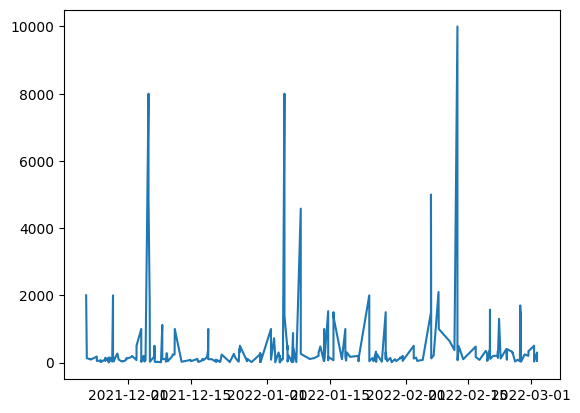

In [139]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['INR'])

In [141]:
df['day_name'] = df['Date'].dt.day_name()

In [142]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

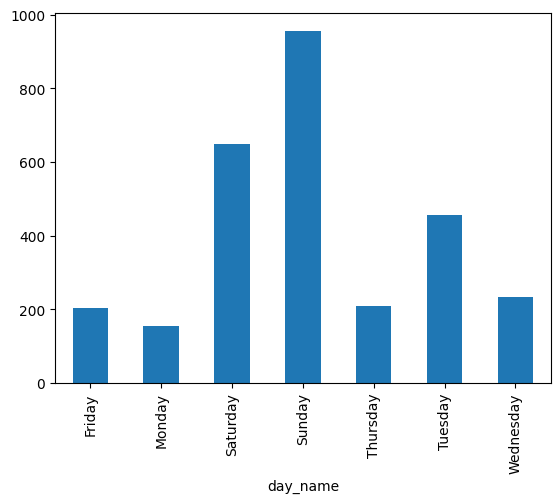

In [143]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [145]:
df['month_name'] = df['Date'].dt.month_name()

df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='month_name'>

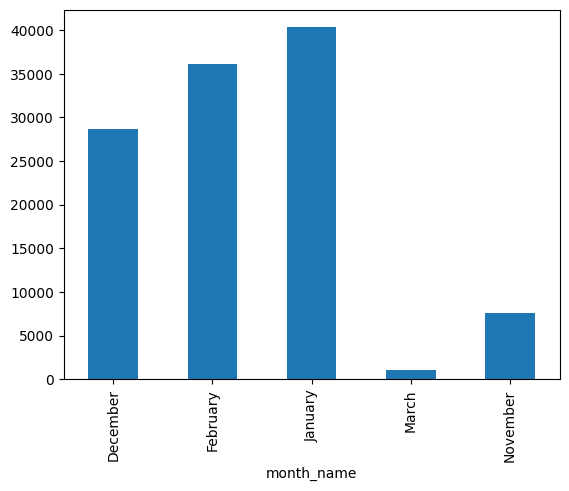

In [146]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [149]:
# Expense on month ends

df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
